<a href="https://colab.research.google.com/github/vanleiko/cursos-coursera/blob/main/Curso_1_Finding_Hidden_Messages_on_DNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Finding Hidden Messages on DNA**

##**Funções acessórias**

###uma_string_por_linha(lista)

imprime cada string em uma linha

In [1]:
def uma_string_por_linha(lista):
  for item in lista:
    print(item, end="\n")

###string_lado_a_lado(lista)

imprime cada string lado a lado

In [2]:
def string_lado_a_lado(lista):
  for item in lista:
    print(item, end=" ")

###Ler arquivos txt

ler arquivos txt

In [3]:
# with open("/content/dataset_5164_1.txt") as arquivo:
#   input_items = arquivo.read().strip().splitlines()
#   Pattern = input_items[0].strip()
#   Dna = input_items[1].strip().split()

##**Week 1**

Procurando a Origem de Replicação (Ori) na bactéria *Vibrio cholerae*:
- sabe-se que a região Ori é constituída por algumas centenas de nucleotídeos.
- há sequências específicas dentro da Ori, as quais chamamos de **DnaA box**, que são sequências onde a proteína DnaA irá se ligar e dar início à replicação (*a DnaA box são várias "mensagens escondidas" dentro da Ori que diz à proteína DnaA: "ligue-se aqui!"*).

**k-mer**: é uma subsequência (*substring*) de tamanho k frequentemente encontrada no DNA.
- Exemplo: ATGC é um 4-mer; ATTTTT é um 6-mer.


###**PatternCount(Text, Pattern)**

Essa função irá contar quantas vezes um padrão (k-mer) aparece em um texto (sequência de DNA)

In [4]:
def PatternCount(Text, Pattern):

  # inicializando a contagem de padrões em zero
  count = 0

  text_len = len(Text)
  pattern_len = len(Pattern)

  # criar um janela de leitura que irá percorrer o texto procurando pelo padrão
  # não há necessidade da janela de leitura ir até o último nucleotídeo do DNA, por isso:  text_len - pattern_len
  # +1, pois range é exclusivo  
  slide_window = text_len - pattern_len + 1

  for pos in range(slide_window):
    if Text[pos:pos+pattern_len] == Pattern:
      count += 1
  
  return count

**Testes:**

In [5]:
# testando a função
Text = "ACGTACGTACGT"
Pattern = "CG"

PatternCount(Text, Pattern)

3

In [6]:
# testando se a função reconhece sobreposições do padrão
Text = "GCGCG"
Pattern = "GCG"

PatternCount(Text, Pattern)

2

In [7]:
# testando se a função reconhece sobreposições do padrão
Text = "ATCCGATCCCATGCCCATG"
Pattern = "CC"

PatternCount(Text, Pattern)

5

In [8]:
# checando se a função lê um padrão presente no início do texto
Text = "AAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAATAATTACAGAGTACACAACATCCAT"
Pattern = "AAA"

PatternCount(Text, Pattern)

4

In [9]:
# checando se a função lê um padrão presente no final do texto
Text = "AGCGTGCCGAAATATGCCGCCAGACCTGCTGCGGTGGCCTCGCCGACTTCACGGATGCCAAGTGCATAGAGGAAGCGAGCAAAGGTGGTTTCTTTCGCTTTATCCAGCGCGTTAACCACGTTCTGTGCCGACTTT"
Pattern = "TTT"

PatternCount(Text, Pattern)

4

In [10]:
# dataset do exercício
Text = "GTGGTAAGGTGGTAAGAGTGGTAAAGTGGTAACCCTCGGGAAGTGTGGTAACGTGGTAAACGTGGTAAGGTGGTAAGTGGTAAAGGTGGTAAGGGTGGTAACCATGGTGGTAAGTGGTAATACAGGTGGTAATGTGGTAATTAGACGTGTGGTAACGTGGTAAATGTGGTAAGCCTGTGGTAAGTGGTAACTCGTGGTGGTAAAATCGGTGGTAAGTGGTAACAGCCGTGGTAATGTGGTAAGTGGTAAGTGGTAAGTGCCGTGGTAAGCGTGGTAAGGGGTGGTAAGTGGTAAAGCGAGTGGTAAGTGGTAAGTGGTAAAATGTGGTAAGTGGTAAGGCTTACGGTGGTAAGTGGTAACGTGGTAATTCCCGGTGGTAAAGTGGTAATGTGGTAGGGGTGGTAAGTGGTAATGGTGGTAAAGTTGTGGTAACGGGGGTGGTAAAGGATGAGGTGGTAATCGGTGGTAATGTGGTAACCTGCGTGCGTGGTAAGGTCAGATTCGTGGTAATGTGGTAATCGCGCGTGGTAATCCGTGGTAATGGAATGTGGTAAGGTGGTAAAGAGCAGGTGGTAATGTGGTAATCGTGGTAAGGGGTGGTAAAATGGTCCGTGGTAAAGTGGTAAGTGTGGTAAGTGGTAACCAATAGAACACGTGGTAAATCGTGGTAAGAGTTGTGGTAATTCGTGGTAACGCGTGGTAACCCCGTGGTAACGTGGTAACGTGGTAACGTGGTAAGGAAGGTGGTGGTAAGGTGGTAAATGTGGTAAGGTGGTAAATGAGAGAACAAGTGGTAAGTATGTGGTAACGTGGTAAGCGGTGGTAAAGGTGGTAAAAGGTGGTAACGACGTGGTAAGGCGTGGTAAAGCGTGGTAACGTGGTAAGTGGTAAAATGTGGTAAGAGTGGTAACGTGGTAAATGTGGTAATCAACGTGGTAAGTGGTAAGATGGTGGTAA"
Pattern = "GTGGTAAGT"

PatternCount(Text, Pattern)

18

In [11]:
# extra dataset
Text = "TAACAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTGAGCCTTTGAGCCTTTTAGCCTTTCAGCCTTTAGCCTTTAAGCCTTTCCGCATCGAGCCTTTCAGCCTTTCGTAGCCTTTCGAGCCTTTAGCCTTTCAGCCTTTAGAGCCTTTAAGCCTTTAGTCGATGTAGCCTTTAGCCTTTAGCCTTTAGCCTTTGCAGCCTTTAGTAGGCAAGCCTTTTAGCCTTTGAGCCTTTCGAGCCTTTCTCGCTAGCCTTTAGCCTTTGGTGAGCCTTTTAGCCTTTAGCCTTTTCGCAGCCTTTTGAGCCTTTCTTGTTTGAATGGCAAGAGCCTTTTCGAGCCTTTAGCCTTTGAGCCTTTCAGCCTTTAAAAGCCTTTCGTTAGCCTTTAGCCTTTATCGAGCCTTTAAGCCTTTTATGCAAAGCCTTTGAGCCTTTAGCCTTTCAGCCTTTCAGCCTTTCATTGACAAGCCTTTCAGCCTTTAGCCTTTAGCCTTTCTCAGCCTTTGAGCCTTTGAGCCTTTGTCGAGCCTTTTTTCAGAGCCTTTTAGCCTTTAGCCTTTGAGCCTTTAGCCTTTAGCCTTTTACGAGCCTTTGCAAGCCTTTCAGCCTTTCCAAGCCTTTAGCCTTTGCTTTAGCCTTTCATGGGATAGCCTTTAGCCTTTATTAAGCCTTTTTTATCAAGCCTTTGTAGCCTTTAAGCCTTTCCAGCCTTTAGGAGCCTTTGTATAGCCTTTTGAGCCTTTCTACAGTAAAGCCTTTTTTGGTCAGCCTTTCTAGCCTTTGATAGCCTTTCTGAAGCCTTTGGCGGAGCCTTTCTGTTAACAGCCCAGCCTTTCTCATAGCCTTTGCGGTATCAGCCTTTGCAGCCTTTCTGGAGCGATAGCCTTTCAGCCTTTCCGAGCCTTTTTCAGAGCCTTTGAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTCCGAGCCTTTTCAGCCTTTACAGCCTTTTTAGCCTTTGAGCCTTTCACAGCCTTTGAGCTAGCCTTTAAGTTAAAGCCTTTAGCCTTTCAGCCTTTACATTAGCCTTTTAGCCTTTTCAGCCTTTAGAGCCTTTAGCCTTTGCTGAAGCCTTTAGTAGCCTTTAGCCTTTGCGAAGCCTTTCTGGTGCAACAAGTGAAGCCTTTGCCCTAGCCTTTGCTAGCCTTTCCGAGCCTTTGTCGATATAGCCTTTAGCCTTTAGAAAGCCTTTAGCCTTTGCTAGCCTTTATAGCCTTTAGCCTTTAGCCTTTCCCAGCCTTTAGCCTTTATCCTAAGCCTTTAGCCTTTTCCAGAAGCAGCCTTTTGATCAGAGCCTTTCTTCGGACTGCTCCCAGCCTTTAGCCTTTCAGCCTTTAGCCTTTAGCCTTTCAGCCTTTAGCCTTTTCTAGCCTTTAGCCTTTGTGTAGCCTTTCTAGCCTTTACGAGCCTTTGCCCAGCCTTTCCCAGCCTTTGAGAGCCTTTACCATATAGCCTTTACATAAGCCTTTGATGAGCCTTTAGCCTTTCGAGCCTTTCAGCCTTTACTCCAGCCTTTATAGCCTTTATATAGCCTTTCCTGTTAGGCCGTCGGTGCAGCCTTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTTAGCCTTTCAGCCTTTGCTAGCCTTTCCAGCCTTTACAGCCTTTTACCGAGCCTTTCCATCAGCCTTTAGCCTTTATATCTCTGATCGGGTAGCCTTTCGGCTAGCCTTTGGTAGCCTTTTTCAGCCTTTATGTAAAGCCTTTGTAGCCTTTGATGTGAGCCTTTAGAAGCCTTTGTCAGCCTTTTAGCCTTTAGCCTTTAGCCTTTTTAAGCCTTTTACAAGCCTTTACTCAGAGCCTTTACGAGCCTTTTAGCCTTTGCAGCCTTTTAGCCTTTTGATGAGCCTTTGCGGAGCCTTTTCTTTCAGCCTTTTGGCAGCCTTTAGCCTTTGTACAGCCTTTTTGAGCACAGCCTTTCGCGAAAGAGCCTTTATCAGCCTTTAAGCCTTTGCTAGCCTTTAGCCTTTTGAGCCTTTAGCCTTTGTATCTGTCTATCATCGAGCCTTTCTAAGCCTTTGCGGAAGCCTTTAGCCTTTGTCAGCCTTTCAAAGCCTTTAGCCTTTTATTCAAGCCTTTGAACCATAGCCTTTGGCAGCCTTTCAAGCCTTTGACGACAGCCTTTAGCCTTTCATTAGCCTTTTAGGAGGCTCATCCGTCTAGCCTTTAAATAGCCTTTAGCCTTTATAGCCTTTAAGCCTTTAGCCTTTTAAGCCTTTGAGAGCCTTTAAAGCCTTTAAACCAAGCCTTTGCGAAGCCTTTAGCCTTTAGCCTTTCGCAGCCTTTAGCCTTTCGAGCCTTTTGTAGCCTTTTGGAGAGCCTTTGGGCAAGCCTTTAGTATAAGCCTTTAGCCTTTTAGCCTTTCAAGCCTTTAGCCTTTAAGCCTTTGGCACAGCCTTTTGAGCCTTTCAGGAGCCTTTATTGGTGAGCCTTTAGTATAGCCTTTTCAGCCTTTGGCAGCCTTTAATGAAAGCCTTTGCTCAGCCTTTTTCAGCCTTTACAGCCTTTCAAGCCTTTAGCCACAAGCCTTTAGCCTTTAGCCTTTCAGCCTTTGCGAGCCTTTGTAGCCTTTAAGCCTTTCAGCCTTTAGCCTTTAGCCTTTTTCAAGCCTTTTCAGCCTTTCAAAGCCTTTCAAGCCTTTGAAGCCTTTCTAAGCCTTTGAGCCTTTGAGCCTTTGAGCCTTTAGCCTTTGTTCCTAGCCTTTATAGCCTTTTAGGCAGCCTTTCAGAGCCTTTTAAGCCTTTAGCCTTTCAGAAAGAGCCTTTAGCCCAGCCTTTTGATTAGCCTTTAGGGAACAGCCTTTAGCCTTTTAAGCCTTTGGTATACAATCAACGCAGCCTTTAGCCTTTAAGCCTTTTGGAGCCTTTCAGACTGATCCCAGCCTTTCAGCCTTTCTCAGCCTTTAAGCCTTTCTCCAAGCCTTTTGAGCCTTTTCGAGCCTTTAGTGAGCCTTTTGAAGCCTTTGTTTAGCCTTTTGTATAGGGTAGCCTTTAGCCTTTCCGGAAGCCTTTTGTAGCCTTTAAGCCTTTTGTCCGGGAAAGCCTTTGTAAGCCTTTAATGCAGCCTTTCCTATAGCCTTTAAGCCTTTCAGCCTTTTGGAGCCTTTTCTCAGCCTTTAGCCTTTCGCCAGCCTTTCTCCCGAGCAGCCTTTTAGAAAAAGCCTTTTAGCCTTTTACCGTGGACAGCCTTTCACGAGCCTTTACAGGCTAGCCTTTAGCCTTTGCTAGCCTTTTCCCAGCCTTTTGAGCCTTTAAGCCTTTCTAAGTTCTACGCTTGGGCTAAAGCCTTTAGCCTTTAAGCCTTTCAGCCTTTTGCAGCCTTTATATAACTTGAGCCTTTAGCCTTTAGCCTTTATAGCCTTTAGCCTTTTAGCCTTTTATATCCCTTAAGCCTTTGTAAGCCTTTAGCCTTTAAGCCTTTACGAGGAAAGCCTTTCATGCAGCCTTTAGCCTTTAGCCTTTGAGCCTTTCCAGCCTTTCAGCCTTTCAGCCTTTAGCCTTTAGCCTTTAGCCTTTTAGCCTTTATGAGCCTTTATAGCCTTTAGCCTTTTCACCAGCCTTTCCAGATGCACAAGCCTTTCAGCCTTTAGCCTTTCGAGCCTTTGGCTTATAGCCTTTCATCAGCCTTTCTAGCCTTTTAGCCTTTAGCCTTTAGCCTTTTCTAGCCTTTCAGCCTTTAGCCTTTTCGAAGCCTTTAGCCTTTTTAGCCTTTAGCTCAGCCTTTAGCCTTTATCTAACAGCCTTTAGCCTTTAGCCTTTAAAGCCTTTATGTCCAATTCTAACAGCCTTTAGCCTTTAAAGCCTTTGCAGCCTTTGAGCCTTTTAGCCTTTGAAGCCTTTAGCCTTTGTCAGCCTTTCCAGCCTTTTAGCCTTTAGCAGCCTTTAGTACGCCAGCCTTTAGCCTTTGTATAAGCCTTTAGCCTTTAGCCTTTCCACTAGCCTTTAGCCTTTAGAGGAGCGATAGCCTTTCAGCCTTTAGAAAGCCTTTGTTGCTGCTAGCCTTTGGGTTCTCAGCCTTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTTGTAGCCTTTTACATAGGATTGATTCAAAAGCCTTTTTGAGCCTTTCTGCATTAGCCTTTTCCTCTAGCCTTTAGCCTTTCGCAGCCTTTAGCCTTTTAGAGCCTTTAGATAGCCTTTCGCGACAGCCTTTTGTTTAGCCTTTAGCCTTTGTTAGCCTTTGAGCCTTTGAGCCTTTTAGCCTTTCCTAGCCTTTCAGCCTTTCCAAAGCCTTTGACAGGGTGTAGCCTTTCTAGCCTTTTTAGCCTTTAGCCTTTAAACTTAAGCCTTTTTAGCCTTTAGCCTTTCAACCCAGCCTTTAGCCTTTTAAGCCTTTAGCCTTTAGCCTTTTTAGAAGCCTTTTAGCCTTTAGCCTTTGGAGCCTTTCAGATCTCAGCCTTTTCGAGCCTTTTAGCCTTTTCAGAAAAGTAGCCTTTTTAGCAGCCTTTTAAAGCCTTTGGAGCCTTTAGCCTTTAGCCTTTGTAGCCTTTTCCCAAAAGCCTTTACAGCCTTTGTGAGCCTTTTAGTTCGTTTGAGCCTTTCCAGCCTTTCAGCCTTTAGCCTTTATAGCCTTTTGCGAGAAGCCTTTAAGCCTTTAGCCTTTTGACGTTCTAGAGCCTTTGGAGCCTTTCACGCGAGCCTTTCAAGCCTTTGACTCCGCAGCCTTTTCGCGACCAGCCTTTGCCGTGCCAGCCTTTAGCCTTTCAACACAGCCTTTAGCCTTTGGGCCGCAGAGCCTTTGAGTAGCCTTTAGCCTTTGACAGCCTTTAGCCTTTCTAGCCTTTGCAGCCTTTGTCTAGGTAGCCTTTAGCCTTTAGCCTTTCTAGCCTTTTAGCCTTTAGCCTTTTGAGCCTTTTGGAAGCCTTTCAGCCTTTAGCCTTTCGCGAGCCTTTGAGCCTTTACCCAGCCTTTACGGAGCCTTTAGCCTTTCCCATAGCCTTTAGCCTTTCCAGCCTTTAGCCTTTTAGCCTTTCAAATCTAAGCCTTTCGCATATATGGTAGCCTTTAGCCTTTAGCCTTTATGGTCCTTCAGTTTGAGCCTTTTAGAGCCTTTAAAGGAGCCTTTGTAAGACGAAGGTAGCCTTTAGCCTTTGCCAGCCTTTTTAGCCTTTAGCCTTTAAAAAGCCTTTGAGCCTTTAGCCTTTAGCCTTTGAGCCTTTAGCCTTTTCTCCTAGCCTTTCATAGCCTTTGAGCCTTTAGCCTTTTAGCCTTTTAGCCTTTAGCCTTTAGCCTTTGGAGGTCAGCCTTTATGTTAAAGCCTTTAGTTCCCAGCCTTTCAGCCTTTAGCCTTTAGCCTTTGAGCCTTTCAGCCTTTTAGCCTTTCAGCCTTTCAGCCTTTGAAGCCTTTTGTAGCCTTTGCCCGAGCCTTTAGCCTTTAGCCTTTCCCAACCCTGATCCGTAGCCTTTGGGCTGATCCTGAGCCTTTTCAGCCTTTAAGCCTTTAGCCTTTAGCCTTTGAGAAGCCTTTAGCCTTTCAGCCTTTAACAGCCTTTAAGCCTTTATAGCCTTTAGCCAGCCTTTGCAGCCTTTCAGTAGCCTTTAGCCTTTAGCCTTTCTAGCCTTTCTTGGAGCCTTTCCCAGCCTTTAAGAGCCTTTAGCCTTTTAGCCTTTCAGCCTTTAGCCTTTTCGTAGCCTTTGACCATTGTCAGCCTTTCTACTGAGCCTTTCATAGCCTTTTTTAGCCTTTCTAGCAGCCTTTGGAGCCTTTAGAAGAGCCTTTAGCCTTTTAAGCCTTTGAGCCTTTAACACAAGCCTTTATCTGGGCCGCGAGCCTTTTCAACCTAACTACAGCCTTTCTAAGCCTTTAGCCTTTAGCCTTTCAGCCTTTTAGCCTTTACCGAGCCTTTGCGGGAAGCCTTTAAAGAGCCTTTAGAAAAAGCCTTTGGGATAGCCTTTCCAGCCTTTCCAGCCTTTTTAGCCTTTTCCTCAAGATTTAGCCTTTGATGAAGCCTTTGAGCCTTTAGCCTTTCATTGAGCCTTTTAAGCCTTTCAGCCTTTTCTCATCAGCCTTTCACAGCCTTTCTACAGCCTTTAGCCTTTAGCCTTTGGAGCCTTTTCGCCCCGAGCCTTTAGCCTTTAGCCTTTTAGCCTTTCAGCCTTTGTAGCCTTTAGAGCCTTTGCTTAGCCTTTAGCCTTTAGTAGCCTTTAGATAGCCTTTTCTGGGAGCCTTTACAGCCTTTAGCCTTTAGCCTTTAGCCTTTTAAAGCCTTTCCCCAAAGCCTTTGTTGAGCCTTTAGCCTTTACAGTCTAGCCTTTAGCCTTTCAAGCCTTTACCTTAGCCTTTGGCAGCCTTTCTAGCCTTTAGCCTTTTCAGCCTTTAGCCTTTAAGCCTTTAGCCTTTTCGAGCCTTTGAGCCTTTAAGCCTTTATAAAAAGCCTTTAGCCTTTAAGCCTTTACCAGCCTTTAGCCTTTCAGCCTTTTATCGGAAAGCCTTTAAGCCTTTTAGCCTTTCAGCCTTTGAGCCTTTCAGCCTTTAGCCTTTGGCAAAGCCTTTTTGCAGCCTTTGGAAGCCTTTAGCCTTTTTCAAGCCTTTCAGCCTTTAGCCTTTGCACGTATTAGGAAGCCTTTTACTCTAAGCCTTTATCAGCCTTTAGCCTTTAGCCTTTAAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTAGCCTTTACGGTCAGCCTTTGGTAGCCTTTTCAGCCTTTAAGCCTTTAAGCCTTTGAGCCTTTAGCCTTTAGCCTTTGAGCCTTTAAGAGCCTTTCAGCCTTTTTTAGCCTTTTAGCCTTTGAGCCTTTCCTAGCCTTTCAAGCCTTTGAGCCTTTCGAAGCCTTTTAGCCTTTAGCCTTTAGCCTTTATGGAGCCTTTAGCCTTTAGCGGAGCCTTTGAGCCTTTACAGAGCCTTTAGCCTTTAGCCTTTTAAGCCTTTTGCAGCCTTTCAAAGAGCCTTTAGCCTTTACGGAGCCTTTAGCCTTTAAGCCTTTCTCACTAGCCTTTTTAGCCTTTGAGCCTTTATGACGAAGCCTTTAGCCTTTTGTCGTGACCTGAGCCTTTAGCCTTTACAGCCTTTCAGCCTTTAGCCTTTCTTAAAAGCCTTTTAGCCTTTTTGAGCCTTTACAGCCTTTCGAGCCTTTGAGCCTTTCCCAGCCTTTGAAGCCTTTTGGACAGAGCCTTTGCTAGCCTTTAGCCTTTTAGCCTTTAGCCTTTAGCCTTTACTTAGCCTTTTAGCCTTTATGGATAGCCTTTAGCCTTTGAGAGCCTTTGCCTAGCCTTTGAAGCCTTTTTAGCCTTTAACGAGCCTTTAGCCTTTAGCCTTTAGCCTTTAAGCCTTTAGCCTTTCGAGCCTTTCTCAGCCTTTGTAGCCTTTAGCCTTTAGAGCAGCCTTTAGCCTTTCCAGCCTTTAGCCTTTTCAGCCTTTAGCCTTTCAGCCTTTGCCCCGAGCACGTAGCCTTTACAGCCTTTAGCCTTTAGCCTTTTAGCCTTTACAGCCTTTTGAGCCTTTAGCCTTTGAAAGCCTTTTGAAGAGCCTTTCAGCCTTTCTTACTAGCCTTTGCAGCCTTTTAGCCTTTCCGAGCCTTTGATAGCCTTTGTCGGTAAGCCTTTGTAGAGCCTTTAGCCTTTAAGCCTTTGGTAAAGAGCCTTTTCAACAGCCTTTCGGAGCCTTTCGCTACAAGCCTTTTGGCCTAGCCTTTAGCCTTTCAGCCTTTCAAGAGCCTTTAGCCTTTCGCAGCCTTTATAGCCTTTCAGCCTTTCAGCCTTTAGCCTTTAGAGCCTTTGAGCCTTTCGTTATCTAAGCCTTTACTCCATAGCCTTTGAGCCTTTAGCCTTTGTCAGTCGAGCCTTTGTTCTTGAGCCTTTAGCCTTTGCAGCCTTTAGCCTTTTGTTTGTGGAGCCTTTAGCCTTTGAATACAGCCTTTAGCCTTTAGCCTTTAGCCTTTCTAGCCTTTCAGCAGCCTTTGTAGCCTTTGAACCAGCCTTTAGCCTTTTAGCCTTTTCCTTAGCCTTTCCAGCCTTTTAGTGAGCCTTTAGCCTTTGCACCAGCCTTTAGCCTTTAGCCTTTCAGCCTTTAGCCTTTCGAGCCTTTTAGCCTTTGAACAGCCTTTTGAGCCTTTGACGATATGAGCCTTTAGCCTTTTGTAGCCTTTTTTAGCCTTTGAACAGCCTTTGGAGTCAAGCCTTTACGCAGCCTTTCCAGCCTTTCAGCCTTTAGCCTTTGGTCAGCCTTTTCAGAGCCTTTGCGGTTAGCCTTTGAATAGCCTTTAAAGCCTTTCTCAGCCTTTGTAAGCCTTTAGCCTTTTAGCCTTTGTGAGCCTTTCAGCCTTTCCGAGCCTTTAGCCTTTGCCTACGGAAGCCTTTAGCCTTTGCTATCAGCTTGAGCCTTTTAGCCTTTAGTAGCAGCCTTTTAGCCTTTTAGCCTTTCAGCCTTTCTCTAGCCTTTAGCCTTTATCCGAGCCTTTACCAGCCTTTGAGCCTTTAGCCTTTATAGCCTTTATACGTAGCTAGCCTTTAGCCTTTAGAGCCTTTACCCTGTACCAGCCTTTAAGCCTTTCTCGTGAAGCCTTTAGCCTTTGAGCCTTTCGAGCCTTTAGCCTTTAGCCTTTAAGCCTTTTTGTGTGAGCCTTTAGCCTTTGGGGAGCCTTTAGCCTTTCAGCCTTTTAGCCTTTTCAAGCCTTTAGCCTTTAGCCTTTTGAGCCTTTAAAGCCTTTAGCCTTTAGGTAGCAAGCCTTTCGTTATAGCCTTTTATAAGCCTTTTTTAATGAGCCTTTAGCCTTTAGCCTTTGAGCAGCCTTTAGCCTTTAGTAGCCTTTTGATATTAGCCTTTCAGCCTTTAGCCTTTCCCCGAGCCTTTGTTAGAGCCTTTGCAGCCTTTGGAGCCTTTAGCCTTTCGGAGCCTTTAGCCTTTGGGACAGCCTTTAGCCTTTAGCCTTTGAAGCCTTTTGCAGCCTTTAAGATAGCCTTTGAGCCTTTTCAGCCTTTACAGCCTTTAAGCCTTTAGCCTTTGAGCCTTTGAGCCTTTTGAGCCTTTTAGCCTTTGTTGCAGCCTTTAGCCTTTAGCCTTTTAGCCTTTAGCCTTTAGCCTTTGAGCCTTTGAGCCTTTTAGCCTTTAGCCTTTGAGCCTTTTGGACAGCCTTTCTGAGCCTTTCGTAGCCTTTACCGCAAGCCTTTATAGCCTTTGAAGAGGAGCCTTTATAGCCTTTCAGAAGCCTTTTAAGCCTTTTCGCAGCCTTTTATCAGCCTTTAGCCTTTAGCCTTTTAGCCTTTCAGCCTTTAGCCTTTACAAGCCTTTAGCCTTTAGCCTTTATCAAGCCTTTCTAGCCTTTGAGCCTTTGTGAGCCTTTGTGTCAGCCTTTCAAGCCTTTTTAAGTACAGCCTTTACTCAGCCTTTATAGCCTTTGTCGTAAGCCTTTAGCCTTTAGCCTTTGAAAAGCCTTTACGCACAGACAAGTAGCCTTTCAGCCTTTAAGCCTTTGAGTATGTCCTTGAGCCTTTAAAAGAGCCTTTGGTAGCCTTTAGCCTTTAGCCTTTTATAGCCTTTAAGCCTTTAAGCCTTT"
Pattern = "AGCCTTTAG"

PatternCount(Text, Pattern)

294

###**FrequentWords(Text, k)**
Essa função irá retornar o(s) kmer(s) mais frequente(s) do DNA. Essa função não é muito eficiente, pois ela percorre o texto:

- uma vez para contar a quantidade de cada kmer (até quando ele se repete, ela percorre o DNA de novo)

- percorre novamente para checar qual kmer equivale a maior quantidade

In [12]:
def FrequentWords(Text, k):

  # um set que irá guardar o(s) padrão(ões) mais frequente(s) (set evita duplicidade)
  frequent_pattern = set()

  # lista irá receber a quantidade de cada padrão
  count_pattern = []

  text_len = len(Text)
  pattern_len = k

  # criar uma janela de leitura no DNA
  slide_window = text_len - pattern_len + 1

  # irá contar cada padrão de tamanho k presente no DNA 
  for pos in range(slide_window):
    pattern = Text[pos:pos+k]   # estabelece o padrão
    count = PatternCount(Text, pattern)  # chama a função PatternCount()
    count_pattern.append(count)   # adiciona a quantidade do padrão na lista

  # verifica qual o maior valor da lista 
  max_count = max(count_pattern)

  # irá verificar qual padrão que tem quantidade igual ao maior valor da lista
  for pos in range(slide_window):
    pattern = Text[pos:pos+k]   # estabelece o padrão
    count = PatternCount(Text, pattern)    # chama a função PatternCount()
    if count == max_count:    # verifica se a qauntidade do padrão é igual ao maior valor da lista
      frequent_pattern.add(pattern)   # se for igual ao maior valor da lista, adiciona o padrão no set
      


  return frequent_pattern   


**Testes:**

In [13]:
# checa se a função está contando o primeiro kmer do texto (TGG)
Text = "TGGTAGCGACGTTGGTCCCGCCGCTTGAGAATCTGGATGAACATAAGCTCCCACTTGGCTTATTCAGAGAACTGGTCAACACTTGTCTCTCCCAGCCAGGTCTGACCACCGGGCAACTTTTAGAGCACTATCGTGGTACAAATAATGCTGCCAC"
k = 3

FrequentWords(Text, k)



{'TGG'}

In [14]:
# checa se a função está contando o último kmer do texto (TTTT)
Text = "CAGTGGCAGATGACATTTTGCTGGTCGACTGGTTACAACAACGCCTGGGGCTTTTGAGCAACGAGACTTTTCAATGTTGCACCGTTTGCTGCATGATATTGAAAACAATATCACCAAATAAATAACGCCTTAGTAAGTAGCTTTT"
k = 4

FrequentWords(Text, k)

{'TTTT'}

In [15]:
# checa se a função está contando sobreposições de kmer no texto (AACAA)
Text = "ATACAATTACAGTCTGGAACCGGATGAACTGGCCGCAGGTTAACAACAGAGTTGCCAGGCACTGCCGCTGACCAGCAACAACAACAATGACTTTGACGCGAAGGGGATGGCATGAGCGAACTGATCGTCAGCCGTCAGCAACGAGTATTGTTGCTGACCCTTAACAATCCCGCCGCACGTAATGCGCTAACTAATGCCCTGCTG"
k = 5

FrequentWords(Text, k)

{'AACAA'}

In [16]:
# checa se a função está contando quanto há mais de um kmer mais frequente 
Text = "CCAGCGGGGGTTGATGCTCTGGGGGTCACAAGATTGCATTTTTATGGGGTTGCAAAAATGTTTTTTACGGCAGATTCATTTAAAATGCCCACTGGCTGGAGACATAGCCCGGATGCGCGTCTTTTACAACGTATTGCGGGGTAAAATCGTAGATGTTTTAAAATAGGCGTAAC"
k = 5

FrequentWords(Text, k)

{'AAAAT', 'GGGGT', 'TTTTA'}

In [17]:
# extra dataset
Text = "CGGAAGCGAGATTCGCGTGGCGTGATTCCGGCGGGCGTGGAGAAGCGAGATTCATTCAAGCCGGGAGGCGTGGCGTGGCGTGGCGTGCGGATTCAAGCCGGCGGGCGTGATTCGAGCGGCGGATTCGAGATTCCGGGCGTGCGGGCGTGAAGCGCGTGGAGGAGGCGTGGCGTGCGGGAGGAGAAGCGAGAAGCCGGATTCAAGCAAGCATTCCGGCGGGAGATTCGCGTGGAGGCGTGGAGGCGTGGAGGCGTGCGGCGGGAGATTCAAGCCGGATTCGCGTGGAGAAGCGAGAAGCGCGTGCGGAAGCGAGGAGGAGAAGCATTCGCGTGATTCCGGGAGATTCAAGCATTCGCGTGCGGCGGGAGATTCAAGCGAGGAGGCGTGAAGCAAGCAAGCAAGCGCGTGGCGTGCGGCGGGAGAAGCAAGCGCGTGATTCGAGCGGGCGTGCGGAAGCGAGCGG"
k = 12

FrequentWords(Text, k)


{'CGGCGGGAGATT',
 'CGGGAGATTCAA',
 'CGTGCGGCGGGA',
 'CGTGGAGGCGTG',
 'CGTGGCGTGCGG',
 'GCGTGCGGCGGG',
 'GCGTGGAGGCGT',
 'GCGTGGCGTGCG',
 'GGAGAAGCGAGA',
 'GGAGATTCAAGC',
 'GGCGGGAGATTC',
 'GGGAGATTCAAG',
 'GTGCGGCGGGAG',
 'TGCGGCGGGAGA'}

In [18]:
# dataset do exercício
Text = "GAAAGTCGGCGTACAAAAGCTCCTATATCCAGTTGAGAATGGAGTCATTGAAAGTCGGCGAAAGTCGGCCAGTTGAGAAGAAAGTCGGCTGGAGTCATTCTCCTATATCTGGAGTCATTCTCCTATATCGAAAGTCGGCGAAAGTCGGCGAAAGTCGGCCAGTTGAGAACTCCTATATCGAAAGTCGGCCTCCTATATCGAAAGTCGGCGTACAAAAGGTACAAAAGCAGTTGAGAAGTACAAAAGGTACAAAAGCAGTTGAGAATGGAGTCATTGTACAAAAGGAAAGTCGGCGTACAAAAGCAGTTGAGAACAGTTGAGAAGTACAAAAGGTACAAAAGCTCCTATATCGAAAGTCGGCTGGAGTCATTGTACAAAAGCAGTTGAGAAGAAAGTCGGCGAAAGTCGGCGTACAAAAGCTCCTATATCTGGAGTCATTCAGTTGAGAACAGTTGAGAACTCCTATATCTGGAGTCATTTGGAGTCATTTGGAGTCATTTGGAGTCATTGAAAGTCGGCTGGAGTCATTCTCCTATATCTGGAGTCATTCAGTTGAGAAGTACAAAAGCTCCTATATCGTACAAAAGCAGTTGAGAAGAAAGTCGGCGTACAAAAGGTACAAAAGGTACAAAAGCTCCTATATCCTCCTATATCGTACAAAAGTGGAGTCATTGAAAGTCGGCGAAAGTCGGCGAAAGTCGGCGTACAAAAGCAGTTGAGAAGAAAGTCGGCCAGTTGAGAAGTACAAAAGTGGAGTCATTGAAAGTCGGCCAGTTGAGAAGAAAGTCGGCCAGTTGAGAACAGTTGAGAATGGAGTCATTTGGAGTCATTCAGTTGAGAACAGTTGAGAAGTACAAAAGGAAAGTCGGCGTACAAAAGCAGTTGAGAATGGAGTCATTGTACAAAAGCAGTTGAGAAGAAAGTCGGCGTACAAAAGTGGAGTCATTGAAAGTCGGCGTACAAAAG"
k = 11

FrequentWords(Text, k)



{'GAAAGTCGGCG'}

In [19]:
# Ori de Vibrio cholerae (k = 9)
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 9

FrequentWords(Text, k)

{'atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'}

In [20]:
# Ori de Vibrio cholerae (k = 8)
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 8

FrequentWords(Text, k)

{'atgatcaa'}

In [21]:
# Ori de Vibrio cholerae (k = 3)
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 3

FrequentWords(Text, k)

{'tga'}

###**PatternToNumber(Pattern)**
Transforma o padrão em um número inteiro. Para isso, devemos colocar todos os possíveis k-mers em ordem alfabética e usar um sistema quaternário para representar cada base. É como se você organizasse todos os possíveis kmers em um dicionário (ordem alfabética) e você precisa achar onde está  o seu padrão nesse dicionário. O número que representará o padrão será a posição que ele se encontra nesse dicionário.

A = 0

C = 1

G = 2

T = 3

exemplo:

DNA = AAGCAAAGGTGGG

2-mer possíveis, em ordem alfabética:





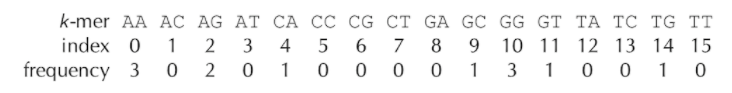





O raciocínio para um 2-mer:

- quantos 2-mers são possíveis? 4^2 = 16
- quantas posições haverá? 16 - 1 = 15

**AA** = ([0*(4^1)] + [0*(4^0)] = posição 0

**AC** = ([0*(4^1)] + [1*(4^0)]) = posição 1

**AG** = ([0*(4^1)] + [2*(4^0)]) = posição 2

**AT** = ([0*(4^1)] + [3*(4^0)]) = posição 3

**CA**= ([1*(4^1)] + [0*(4^0)]) = posição 4

**CC** = ([1*(4^1)] + [1*(4^0)]) = posição 5

**CG** = ([1*(4^1)] + [2*(4^0)]) = posição 6

**CT** = ([1*(4^1)] + [3*(4^0)]) = posição 7

**GA** = ([2*(4^1)] + [0*(4^0)]) = posição 8

**GC** = ([2*(4^1)] + [1*(4^0)]) = posição 9

**GG** = ([2*(4^1)] + [2*(4^0)]) = posição 10

**GT** = ([2*(4^1)] + [3*(4^0)]) = posição 11

**TA** = ([3*(4^1)] + [0*(4^0)]) = posição 12

**TC** = ([3*(4^1)] + [1*(4^0)]) = posição 13

**TG** = ([3*(4^1)] + [2*(4^0)]) = posição 14

**TT** = ([3*(4^1)] + [3*(4^0)]) = posição 15



In [22]:
def PatternToNumber(Pattern):
  Pattern = Pattern.upper()

  # criar um dicionário com um sistema quaternário: cada número representa uma base, em ordem alfabética
  dic = {"A": 0,
         "C": 1,
         "G": 2,
         "T": 3}

  pattern_len = len(Pattern)

  # essa variável irá devolver a posição do padrão que estamos procurando. inicializá-la com zero
  pattern_pos = 0
  count = 1

  # vai iterando cada base do padrão até calcular sua posição (seguindo a ordem alfabética)
  for base in Pattern:
    index = dic[base] * (4**(pattern_len-count))
    pattern_pos += index
    count += 1
  
  return pattern_pos

In [23]:
Pattern = "ATGCAA"

# 0(4^5) + 3(4^4) + 2(4^3) + 1(4^2) + 0(4^1) + 0(4^0)

PatternToNumber(Pattern)

912

###**NumberToPattern(index, k)**

essa função deve retornar o padrão, dado a posição que o padrão ocupa no nosso dicionário de possíveis kmers e dado o valor de k.

In [24]:
def NumberToPattern(index, k):

  dic = {0: "A",
         1: "C",
         2: "G",
         3: "T"}

  # lista irá receber os nucleotídeos
  nt_list = []  
  count = 1
  
  while count <= k:    # a divisão será feita k vezes
    nt = index % 4    # o número que corresponde ao nt é igual ao resto da divisão
    index = index // 4    # o novo índice é o quociente da divisão 
    nt_list.append(dic[nt])  # já adiciona o nt à lista
    count += 1   

  pattern = "".join(reversed(nt_list))    # fazer o reversed porque a lista começa pelo último nt

  return pattern

In [25]:
index = 5437
k= 7

NumberToPattern(index, k)

'CCCATTC'

In [26]:
index = 5437
k= 8

NumberToPattern(index, k)

'ACCCATTC'

###**ComputingFrequencies(Text, k)**

In [27]:
# retorna a frequencia de cada kmer dispostos em ordem alfabética
def ComputingFrequencies(Text, k):
  text_len = len(Text)
  n = 4**k   

  # iniciar uma lista com 4^k zeros
  frequency_array = [0] * n

  # vai calcular a frequência de cada kmer (em ordem alfabética)
  for pos in range(text_len - k + 1):
    pattern = Text[pos:pos+k]
    index = PatternToNumber(pattern)
    frequency_array[index] += 1   

  return frequency_array



In [28]:
Text = "ACGCGGCTCTGAAA"
k = 2

ComputingFrequencies(Text, k)


[2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0]

In [29]:
Text = "TTACGAATCATTAGGCCCTTTTTTGCGCCCGACTATTCTGGCGTATCCTTTTGCATGGGTAAGCTCATCTCACGAGGCGCGAAATCCCGACCCCATTTGACGAGAGATGTTCATCGAAGGCGGAACAACGGCGTACCGGAAATCTTTCAGGTGCTATCTAACTTGACCCCTGGACCTCCCTGTACCTAGGTATACTGTTGCTATGTTTCAGTCGTATACTATAGGGGCCGTTTGACGGTCACGCGACGACGAGAAAATAGGCCACGGTGCCAGCTGTTCCCGGTGATTAGGATCCTGTTATCATCCAGACGCTACACATCGCACAACACCCGGGGGCGCGGACGCAGTCTAATTTCCCTGTTCCCTCTTCAGGCCCAGGAGGGTTCGTCTAGTCAGGTAGTCATCTGTTAGGAGCGTTCGTATCCGTCGGCGCGTCTTGCCCCCTGGTCTCGATCTACTAGGAGATCTGGAGGAACTGGGAATAGTTTGGCCTGCCGTGGCTTCACGGAAAAGCTACACGACCCGCTCGGCGATAAGGTAAATCTATAACGTGAGGCTGGCCCCAATACGTATAGAATTTTACGATTCTTGGAGGGCCCGTCACCGCTCATATACAAGTCATAGCGTTCTCTTACATGTAGGCCCACGGGTTCTCGTAGAACGCTCTAAGCGTGGCCTGGACCCACATGGTTGTTTTGATAACTTGATGGCCGTTTCTCCTCACCTAGATCCTCTGAGAACTAAGACGCCTTGCCTATGAC"
k  = 6

lista = ComputingFrequencies(Text, k) 

for item in lista:
  print(item, end=" ")

0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 

###**FasterFrequentWords(Text, k)**

calcula o kmer mais frequente de maneira mais rápida

In [30]:
def FasterFrequentWords(Text, k):
  n = 4**k    # possibilidades de kmers
  frequent_pattern = set()
  frequency_array = ComputingFrequencies(Text, k)
  max_value = max(frequency_array)

  for i in range(n-1):
    if frequency_array[i] == max_value:
      pattern = NumberToPattern(i, k)
      frequent_pattern.add(pattern)

  return frequent_pattern

**Teste**

In [31]:
Text = "TGGTAGCGACGTTGGTCCCGCCGCTTGAGAATCTGGATGAACATAAGCTCCCACTTGGCTTATTCAGAGAACTGGTCAACACTTGTCTCTCCCAGCCAGGTCTGACCACCGGGCAACTTTTAGAGCACTATCGTGGTACAAATAATGCTGCCAC"
k = 3

FasterFrequentWords(Text, k)

{'TGG'}

In [32]:
import timeit

In [33]:
# testando o tempo de FasterFrequentWords(Text, k)
start = timeit.default_timer()

FasterFrequentWords(Text, k)

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  0.0006070449999953098


In [34]:
# testando o tempo de FrequentWords(Text, k)
start = timeit.default_timer()

FrequentWords(Text, k)

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  0.018210244999991687


###**FrequencyTable(Text, k)**

retorna um dicionário onde o kmer é a chave e a sua quantidade é o valor

In [35]:
def FrequencyTable(Text, k):
  freqMap = {}
  n = len(Text)

  for i in range(n - k + 1):
    Pattern = Text[i:i+k]   # define o padrão
    if Pattern in freqMap.keys():   # checa se já existe a chave no dicionário
      freqMap[Pattern] += 1 
    else:
      freqMap[Pattern] = 1

  return freqMap

**Teste**

In [36]:
Text = "ACGTTTCACGTTTTACGG"
k = 3

FrequencyTable(Text, k)


{'ACG': 3,
 'CAC': 1,
 'CGG': 1,
 'CGT': 2,
 'GTT': 2,
 'TAC': 1,
 'TCA': 1,
 'TTA': 1,
 'TTC': 1,
 'TTT': 3}

###**MaxMap(map)**

Retorna o maior valor do dicionário

In [37]:
def MaxMap(map):
  return max(map.values())

###**BetterFrequentWords(Text, k)**

Otimização da função FrequentWords(Text, k). 

Usa o dicionário acima da função acima. 

Retorna o(s) kmer(s) mais frequente(s) do DNA.

In [38]:
# retorna o maior valor do dicionário
def MaxMap(map):
  return max(map.values())

# retorna o(s) kemr(s) mais frequente
def BetterFrequentWords(Text, k):
  FrequentPatterns = []
  freqMap = FrequencyTable(Text, k)   # chamando a função
  max = MaxMap(freqMap)               # chamando a função

  for Pattern in freqMap.keys():
    if freqMap[Pattern] == max:
      FrequentPatterns.append(Pattern)
  
  return FrequentPatterns

**Testes**

In [39]:
Text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
k = 4

BetterFrequentWords(Text, k)

['GCAT', 'CATG']

In [40]:
# checa se a função pega o primeiro kmer
Text = "TGGTAGCGACGTTGGTCCCGCCGCTTGAGAATCTGGATGAACATAAGCTCCCACTTGGCTTATTCAGAGAACTGGTCAACACTTGTCTCTCCCAGCCAGGTCTGACCACCGGGCAACTTTTAGAGCACTATCGTGGTACAAATAATGCTGCCAC"
k = 3

BetterFrequentWords(Text, k)



['TGG']

In [41]:
# checa se a função pega o último kmer
Text = "CAGTGGCAGATGACATTTTGCTGGTCGACTGGTTACAACAACGCCTGGGGCTTTTGAGCAACGAGACTTTTCAATGTTGCACCGTTTGCTGCATGATATTGAAAACAATATCACCAAATAAATAACGCCTTAGTAAGTAGCTTTT"
k = 4

BetterFrequentWords(Text, k)

['TTTT']

In [42]:
# checa se a função pega sobreposição de kmers
Text = "ATACAATTACAGTCTGGAACCGGATGAACTGGCCGCAGGTTAACAACAGAGTTGCCAGGCACTGCCGCTGACCAGCAACAACAACAATGACTTTGACGCGAAGGGGATGGCATGAGCGAACTGATCGTCAGCCGTCAGCAACGAGTATTGTTGCTGACCCTTAACAATCCCGCCGCACGTAATGCGCTAACTAATGCCCTGCTG"
k = 5

BetterFrequentWords(Text, k)

['AACAA']

In [43]:
# checa se a função pega quando há mais de um kmer mais frequente
Text = "CCAGCGGGGGTTGATGCTCTGGGGGTCACAAGATTGCATTTTTATGGGGTTGCAAAAATGTTTTTTACGGCAGATTCATTTAAAATGCCCACTGGCTGGAGACATAGCCCGGATGCGCGTCTTTTACAACGTATTGCGGGGTAAAATCGTAGATGTTTTAAAATAGGCGTAAC"
k = 5

BetterFrequentWords(Text, k)

['GGGGT', 'TTTTA', 'AAAAT']

**Teste com Vibrio cholerae**

In [44]:
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 3

BetterFrequentWords(Text, k)

['tga']

In [45]:
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 4

BetterFrequentWords(Text, k)

['atga']

In [46]:
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 9

BetterFrequentWords(Text, k)

['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat']

**Testando qual das funções é a mais rápida para achar o kmer mais frequente no DNA**

In [47]:
Text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k = 9

In [48]:
# testando o tempo de FrequentWords(Text, k)
start = timeit.default_timer()
FrequentWords(Text, k)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.07865430600000423


In [49]:
# testando o tempo de FasterFrequentWords(Text, k)
start = timeit.default_timer()
FasterFrequentWords(Text, k)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.02729486500001599


In [50]:
# testando o tempo de BetterFrequentWords(Text, k)
start = timeit.default_timer()
BetterFrequentWords(Text, k)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.00044501700000409983


###**ReverseComplement(Pattern)**

Devolve a fita complementar reversa do DNA

In [51]:
def ReverseComplement(Pattern):

  reversecomplement = ''

  complement = {"A": "T",
                "T": "A",
                "C": "G",
                "G": "C"}

  for base in Pattern[::-1]:
    reversecomplement += complement[base]

  return reversecomplement


**Testes**

In [52]:
Pattern = "AAAACCCGGT"

ReverseComplement(Pattern)


'ACCGGGTTTT'

In [53]:
Pattern = "ACACAC"

ReverseComplement(Pattern)


'GTGTGT'

###**PatternMatching(Pattern, Genome)**

retorna as posições onde o padrão se encontra no genoma

In [54]:
def PatternMatching(Pattern, Genome):
  t = len(Genome)
  k = len(Pattern)
  positions = []

  for pos in range(t - k + 1):
    if Genome[pos:pos+k] == Pattern:
      positions.append(pos)

  return positions


**Testes**

In [55]:
Genome = "TTTTACACTTTTTTGTGTAAAAA"
Pattern = "ACAC"

PatternMatching(Pattern, Genome)

[4]

In [56]:
# checa se pega o padrão do começo
Genome = "AAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAATAATTACAGAGTACACAACATCCAT"
Pattern = "AAA"

PatternMatching(Pattern, Genome)



[0, 46, 51, 74]

In [57]:
# checa se pega o padrão do final
Genome = "AGCGTGCCGAAATATGCCGCCAGACCTGCTGCGGTGGCCTCGCCGACTTCACGGATGCCAAGTGCATAGAGGAAGCGAGCAAAGGTGGTTTCTTTCGCTTTATCCAGCGCGTTAACCACGTTCTGTGCCGACTTT"
Pattern = "TTT"

PatternMatching(Pattern, Genome)

[88, 92, 98, 132]

In [58]:
# checa se pega sobreposições de padrões
Genome = "ATATATA"
Pattern = "ATA"

PatternMatching(Pattern, Genome)

[0, 2, 4]

###**FindClumps(Text, k, l, t)**

Retorna os padrões de tamanho k presentes t vezes em uma janela de leitura de tamanho L no genoma

In [59]:
def FindClump(Text, k, L, t):
  Patterns = []
  n = len(Text)
  
  for pos in range(n - L + 1):
    Window = Text[pos:pos+L]
    freqMap = FrequencyTable(Window, k)   # chamando a função
    for key in freqMap.keys():
      if freqMap[key] >= t:
        Patterns.append(key)
    
  return set(Patterns)

**Testes**

In [60]:
# checa se a função conta os padrões que estão completamente dentro da janela
Text = "AAAACGTCGAAAAA"
k = 2
L = 4
t = 2

FindClump(Text, k, L, t)

{'AA'}

In [61]:
# checa kmers de tamanho 1
Text = "ACGTACGT"
k = 1
L = 5
t = 2

FindClump(Text, k, L, t)

{'A', 'C', 'G', 'T'}

In [62]:
# chaca kmers sobrepostos
Text = "CCACGCGGTGTACGCTGCAAAAAGCCTTGCTGAATCAAATAAGGTTCCAGCACATCCTCAATGGTTTCACGTTCTTCGCCAATGGCTGCCGCCAGGTTATCCAGACCTACAGGTCCACCAAAGAACTTATCGATTACCGCCAGCAACAATTTGCGGTCCATATAATCGAAACCTTCAGCATCGACATTCAACATATCCAGCG"
k = 3
L = 25
t = 3

FindClump(Text, k, L, t)

{'AAA', 'CAG', 'CAT', 'CCA', 'GCC', 'TTC'}

In [63]:
Text = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
k = 5
L= 50
t = 4

FindClump(Text, k, L, t)

{'CGACA', 'GAAGA'}

In [64]:
Text = "gatcagcataagggtccCTGCAATGCATGACAAGCCTGCAGTtgttttac".upper()
k = 4
L = 25
t = 3

FindClump(Text, k, L, t)


{'TGCA'}

In [65]:
Text = "GCGGTTATGCACCGTTCAAATTAGCAAACCACTAAGCGACGTAGTCTGGATTGATTTCTCCCTACCAGTGACCCAAGACGCGTTAGTGAGTTAAGTTCATATCCAGTACCTGCCGCCCTCTGTACTTGGGCGTCCGATTCGCATGCTTACTCAGGTGGAGGACACGATAATCTGATTAAACTGAGCTAAACCAGGTGGAACCAGAAACCAGGTGGGGAGTCTCGCTTCAAGCCGTTCTTGCGATCAAACCAGGTGGTCCATTATGAAACCAGGTGGCTAAACCAGGTGGTCCAGATCCTCGAATGATGTCGGTGCACATCAAAACCAGGTGGGGTGGTGGAACGTAAAACCAGGTGGCATAAACCAGGTGGGCCGGTTCGTAAACCAGGTGAAACCAGGTGGGGTGGAAACCAGGTGGGTTACAAATTACGTTGAGATGGCCCAAACCAGGTGGTGGGCTTCACCCATGTCAACAAACCACCCTATGGAACTAAACCAGGTGGAACCAGGTGGTGAAGGCTTATCCTCAGGAAAAACCAGGTGGAGGTGGTGAAATAAAACCAGGTGGACCAGGTGGATAACCCTCGCCTCGCTTCTCAACCGAGACCTGGATAAACCAGGTGGGGTGGTCCACCGATTTTTGAGACACTAGAAACCAGGTGGGCGGGGAAACCAGGTGGCAAACCAGGTGGGGTGGACGGAAACCAGGTGGATATGTCATAAAACCAAACCAGGTGGTGCACCCCCATGGTGTGTCTTATCCGTGCGTATAAACCAGGTGGTCGCACGGCTTCCACTTGCTGAGAATAGGCCCGCAGGGTCAGTGCCATGCCCTCCGTCACTCGATATGTGTTGTAAGAGTGGTTACCCCTTCATTGAAGTCGCCCACAGCCCCACCTGCATTGCTAGACTATCACCCTACAGTAGGCCTTTTCGCCTTCTTCAAGCAGCAATCTCTTATCCGCGGATGGGCGCGGCGAGCGTGGCGTCCCCGAACATTTTTACCTAACGTGTTTTGTTGGCCGCAAGCCTTCCCTCTAGTCCACCTCAGCCATTCAGCCTAGTAGCTTTCAAGCCGAGCCTTCCATATCTAATGGACCGTCCAGAATTTCACACGTTTCACAGGGCTGTGTTCGACCGCCCGTAATGCTGTTTCACAGGCGATCGCCTTGCGGTTTTTTCACAGATCGCAGCCGATGGACATGCCAACTCGATTTTCACAGAGTTTTTCACAGCGGTTTCACAGCACAGCAGTGATTGTTTCACAGCAATTTTCACTTTCACAGGGGCCCTTTTCACAGCTCAGGGCTCTTTTCACTTTCACAGTTTCACAGCGCTCCTTTCACAGAGCGGGGAAATTTAAGGGAACACTCAAGGGAACAAGGGAACACACAAAGGGAACACAACACAACACATAAGGGAACACTTTCACAGAACACAAAAGTCCGAAATCATCAGCGGCGAAGGGATTTCACAGACAGACACTTTCACAGCGCATTTCACAGATACGTACTTTCACAGGCGTACTTTCACAGACTTTCACAGAGGACAAGCTCAATTTTCACAGACAGGCTGGATAAATTTCACAGCGGTAAGGGTTTCACAGCACACATAAGGGAACACGAATTTCACAGCAGGGAACACCTCTACGAGTAATCTATTACTCTACCTACTGAAGGGAACACACCGAAGACCTACTATTACCTATTACTCTTAAAGGGAACACATTACAAGGGAACACACTCTCTCGTCATATCTCACCTCTCTATTACTCTTAAGGGAACACCTTCTCGATCAACCTATTACTCTATGGAGATAGAGATATTCCAGACATATGGAGATAACATGGAGATATGGAGATAATGGAGATGGAGATAGCTCTTATATTTATCCTATGGAGATATGATACTATTAATGGAGATAATTCTAATGGAGATATAATTACTCTAAGAGGATGGGATCTCGGGCTATTACTCTAATGGAGATAAGCACTATTACTCTAGGAAATGGAGATATGTCAATGGAGATATGTAATGGAGATAGAGGGAGATGGAGTCGCCATTTCATAATCGCCATTTCATAGTTCAGGAATCGCCATTTCCGCCATTTCTAAGATGGAGTCGCCATTTCTACGTATGGAGATAGGATCGCCATTTCATACGACCCGTTGGATATCGCCATTTCCTCGCCATTTCTGGTGACATTTCTCGCCATTTCATTTCTGGAGATAGATGGATCTCGCCATTTCATAGGAATCGCCATTTCCACGTAGGGGGGGCCACAATCCGTAGGTCGGAATTCAGACTCGCCATTTCCCATCGCCATTTCTTCACCTGTATGCCGATCCCTTCGCCATTTCTCATGGAGATAACTCTCTCTCGCCATTTCTCGCCATTTCCATTTCACTCTCATTCGCCATCGCCATTTCCATTCGCCATTTCATCGCCATTTCTTCAGGATAAGATATCGCCATTTCGACTCTCATTCGCATACTGACTCTCATTCTCATCTCGCCATTTCTCATCTGACTCTCATCCTGGGGGAAACTTGCGACTCTCATCACACTTCCGTCGACTCTCATACTGGCGGATAGCATAGGAGCCATTTAAAGACTCTCATTCTCATTCGAGACTCTCATTCAAATCCTACGAGGACTCTCATATAGACTCTCATATCATTACGAGGACTCTCATATACGAGCCATGCATGTGGCGACGACTCTCATCTACGAGCCATGCAAGCAGAATCTACGAGCGACTCTCATTACGAGCCATGTGACCGTACGAGCCATGCATGCATGCCATGCTGACTCTCATCGAGTACGAGCCATGGAAGTTCTTGTTGGTTCGTAGCCCAAGAGCTGAAGTTACGAGCCTACGAGCCATGAAGTTACTTTTACGAGCCATGAAGCTTACGATACGAGCCATGCGAGCCATGCATCCGCGCTACGAGCCATGTTCCAGTACGAGCCATGTTAGTTGCTGAAGTTAAGTTTGGCGCTGAAGTTTGTACGAGCCATGTGCCCGCTGAAGTTTGTTGTACGAGCCATGCATGCTGAAGTTAATGGCTGAAGTTAGCGTTTGCGGGCAGATCCTCATTCTACGATACGAGCCATGCCATGCAGCTGAAGTTAAGTTGGGTTACGAGCCATGCGAGCCATGTGAAGTACGAGCCATGCTGGCTGAAGTTGTTTGTGCTGCTGAAGTTGCTCTTGTCTCTAGCTGAAGTTGCCAACAGGGCTGAAGCTGAAGTTTAAGCTGAAGTTGCGAGCAGGCTGAAGTTATCGGATTGGGGCTGAAGTTCAACCTCCCGTCCCCCCACACTATATTCCCGTCCCCCCCCGCGCACGCGCCGTCTCCCGTCCCCCCTATCCCGTGCGCACGCGACGCGATCCCGTCCCCCCAGAGTGCGCGCACGCGTCCCCCTTCCCGTCCCCCTCTCCCGGGCGCACGCGTCGCTCAACATTTCCGCGCACGCGTCGCGCACGCGGGCGCACGCGGGTCCCGTCCCCCCCCCTCTTCGGCGCACGCGGAATTCCCGTCGCGCACGCGTCCCGTCCCGCGCACGCGTCGCGCACGCGACTGCCCTAACCAACAGTGCGCACGCGCCGGTAACCCGGTAACCCGGTAACCGCGCACGCGGGCGCACGCGCGTAACCCGCGCACGCGCCGCGCACGCGGCCCGGTTCCCGTCCCCCCCGGTAACCCGGTAACTCCCGTCCCCCGTAACCCGGTGCGCACGCGCCCGGCGCACGCGGAGCGCACGCGCCCCCCCCGGTAATAGCGCACGCGCCCGGGCGCACGCGCCCGGTAACCCGGTAACCCGGGCGCGCGCACGCGGCGGCGCACGCGGCGCACGCGGCGCACGCG"
k = 11
L = 566
t = 18

FindClump(Text, k, L, t)

{'AAACCAGGTGG'}

##**Week 2**

A **fita contínua** (ou reverse, 3'-5') possui **maior quantidade de citosina**, visto que sua fita-filha será sintetizada continuamente (todo tempo como uma fita dupla, evita deaminação das citosinas, por isso tem maior quantidade de C).

A **fita descontínua** (ou forward, 5'-3') possui **menor quantidade de citosina**, visto que sua fita-filha será sintetizada descontinuamente (maior parte do tempo permanece como fita simples, maior probabilidade de deaminação de suas citosinas, por isso possui menos C).

Se estivermos lendo o DNA no sentido 5'-3', numa região com alta quantidade de citosinas (baixo #G - #C) e de repente a quantidade de citosinas diminuir (alto #G - #C), significa que estamos/passamos a Origem de replicação (Ori).

###**Skew(Genome)**

retorna a diferença entre C e G nos primeiros i nucleotídeos do genoma

In [66]:
def Skew(Genome):
  sk = [0]    # lista inicia com zero
  t = len(Genome)

  for pos in range(t):
    if Genome[pos] == "G":
      sk.append(sk[pos]+1)    # 'pos' retorna o valor anterior da lista
    elif Genome[pos] == "C":
      sk.append(sk[pos]-1)
    else:
      sk.append(sk[pos])    # mantem o mesmo valor anterior 

  return sk

**Testes**

In [67]:
Genome = "CATGGGCATCGGCCATACGCC"

Skew(Genome)

[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]

In [68]:
Genome = "GAGCCACCGCGATA"

Skew(Genome)

[0, 1, 1, 2, 1, 0, 0, -1, -2, -1, -2, -1, -1, -1, -1]

### **MinimumSkew(genome)**

retorna a posição no DNA em que o skew atinge o menor valor

In [69]:
def MinimumSkew(Genome):
  index = {0: 0}    # dicionário com a posição o seu valor de skew
  t = len(Genome)

  for pos in range(t):
    if Genome[pos] == "G":
      index[pos+1] = index[pos]+1
      
    elif Genome[pos] == "C":
      index[pos+1] = index[pos]-1

    else:
      index[pos+1] = index[pos]

  minimun = min(index.values())   # menor skew
  min_index = []

  for key in index.keys():
    if index[key] == minimun:   # pega a chave que tem o menor skew
      min_index.append(key)

  return min_index

**Testes**

In [70]:
Genome = "TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"

MinimumSkew(Genome)

[11, 24]

In [71]:
Genome = "ACCG"

MinimumSkew(Genome)

[3]

In [72]:
Genome = "ACCC"

MinimumSkew(Genome)

[4]

In [73]:
Genome = "CCGGGT"

MinimumSkew(Genome)

[2]

In [74]:
Genome = "CCGGCCGG"

MinimumSkew(Genome)

[2, 6]

In [75]:
# arquivo = open("/content/dataset_7_6 (1).txt")
# Genome = arquivo.read()

# MinimumSkew(Genome)

### **HammingDistance(seq1, seq2)**

calcula a quantidade de mismatches entre 2 sequências

In [76]:
def HammingDistance(seq1, seq2):
  count = 0

  for nt1, nt2 in zip(seq1, seq2):
    if nt1 != nt2:
      count += 1

  return count

**Testes**

In [77]:
seq1 = "GGGCCGTTGGT"
seq2 = "GGACCGTTGAC"

HammingDistance(seq1, seq2)

3

In [78]:
seq1 = "AAAA"
seq2 = "TTTT"

HammingDistance(seq1, seq2)

4

In [79]:
seq1 = "ACGTACGT"
seq2 = "TACGTACG"

HammingDistance(seq1, seq2)

8

In [80]:
seq1 = "ACGTACGT"
seq2 = "CCCCCCCC"

HammingDistance(seq1, seq2)

6

In [81]:
seq1 = "ACGTACGT"
seq2 = "TGCATGCA"

HammingDistance(seq1, seq2)

8

In [82]:
seq1 = "GATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACT"
seq2 = "AATAGCAGCTTCTCAACTGGTTACCTCGTATGAGTAAATTAGGTCATTATTGACTCAGGTCACTAACGTCT"

HammingDistance(seq1, seq2)

15

In [83]:
seq1 = "AGAAACAGACCGCTATGTTCAACGATTTGTTTTATCTCGTCACCGGGATATTGCGGCCACTCATCGGTCAGTTGATTACGCAGGGCGTAAATCGCCAGAATCAGGCTG"
seq2 = "AGAAACCCACCGCTAAAAACAACGATTTGCGTAGTCAGGTCACCGGGATATTGCGGCCACTAAGGCCTTGGATGATTACGCAGAACGTATTGACCCAGAATCAGGCTC"

HammingDistance(seq1, seq2)

28

In [84]:
seq1 = "TATGGTGCCATTCTGCGTAACACATTACTCGATTTCGATGTTATCTGCTCTCGGAACATTTTGCAGCAACTCGTTTTCCACTGAAAATCTTGAGTTTCCGTGGGCCGCAGCTGGCCGTATCGGGATTTACCTATTATGTTATTTACATCGAACACTGGAAAGGATGCACGCGCTGGAACACCCCGATTCTGGCTAGTTTCATGAGCGCGGGAACTTGAGTAACCCTCTGTTAGAAGCAAACCTCCTGCGTGTGTTGGAAAAGATTTTGTTCGTATTAGCCCATGTGCAGAAAGAGGTCGATCCCTCATATGACCCCCCATGGCGAAGGAGATAGGATCAATAATGAGGACATCCCGCCTTTAAATGACCACACGAAGGCGGATAGGCTTTTGGTGTTGAGAGCTATCCCAGTCTGCGTCGTAAGAATGATCATACTATAAAGCGTCCCCTATATACATAAGACCCAGCGGCGTTAGGTGAGAGTAGATGAACGACGTCGGCATCCAACCGCCCACGCTACGTAAAGCTTACACCGCGCCCCTTTCGGGGACCAATCCCGAAAAGACACGGAGGAGTACTAGTCCCATCGCAGTCCATTGTGCTAGTAATCGATCCCGCCCATTCACTGCCTTGCGTTATTGCAGTGAGTCCAACGCCAGAACAGATCTCCGAGTCTCCGAGTACGCAAACTAGAAGATTGTTTTGGATGGCACCAACTCACAGATTGGCGCGTTTTTTAGGGACTGACCGGTTACAAAGGAAACGCTGGGTTTCGATCGTTTTGCCCGGTAACCCTCGCTCGGCCAATCTTTATCCATGGTTGAACAACCGGCTCGCTGGAGCTTAACTACAATTGATCGAGGATAAAATAACACGTGTAGATCTAGTAACCGTCTTTCAGTAGATTGTGGAGGTCCTATGGAACCGCGTAATTCCCGACCCCCTGGCAAGGGGCCTTACGATGACTTTGTAGGTGCTTTTATCCGAATGGATTACTGGAGCC"
seq2 = "GGGCGATGCCGTGAGCCAGATTACTGCACGATGACGTACGAGCTGACGGGCATTCTCCGCCGATCACTCTACTATTATCTGGTAGACAGCTCCAGAACCAGGTTGGCGATGGCTGCGTAAATTTTGGCTGTGGGCTAAATGTGCGAAAATTCTTGGTACGTTATTAATAATGGCCAGCATCCTGAATCCACTGAACAGCCTTAACCGTAAATTTGAACGCAGCGTCGGGTAGTGTTCGTCCCGGATGATTATCCTAGCAAGTGGGCTTAGACGGGCAGTATTAACGCAGCCTGTGGCTTATCAAAAGTCCGGGCCCATTTAGATGAAGCGCGCACCTGGCAGCGAACAACTATATTAATTAATACAGCCCTGGAAGTAGCAATCGCTATCGCGCATAATGCTCTAAAGGGCTTGCAATGGTCCTGCGCATAGGCTTTTATGAAAGTCGGTCAAGTATGGCCTGTATCGCGATGGCCTTGCGTTCTACGGTCTTACCACATTGTGTAAACTTTGTTGATATACTATTCAAAAAGAGTCCAATTTCACTGCGTGGTGGTAACCGCGTTACGTAAAGTATGAAAGTTGGATAACCCACGGTCTATTTGTAAGGATAACGCTTAAGGAGGCTCAGTGTTGGTTGCTTATACATTGCATTATGGTGACTTAAAGCCAAATCAGCTAGGTGCCCGCTGCTGCGTCTTACTCGGACCGGATGCGTAGCTCAGGGAGTCATACGTTATAACGTCTACACTAACATGTTGTATTATACCTGTTGGCTGGACTAAAGAAAACCGTTTAAAGACCGTCCCAACAGCCCTTTAAGCGGATTATTCGTCGGTTGGCCGCAGGATGGCGATTCCTGTGTCCTAATGATCAGAGTCGAGGGGACGTGTCTCCATTTCGCCAAATGGACAGAAGGGTGTGTATAGGTCATGTGGTTTTTATACGGAAGACAAGTGATGTGACTATAAGATGCCATTTGGAAGTTGGCTAAATAGCTGTG"

HammingDistance(seq1, seq2)

758

 ### **ApproximatePatternMatching(Pattern, Genome, d)**

 retorna as posições dos padrões no genoma, com no máximo d mismatches

In [85]:
def ApproximatePatternMatching(Pattern, Genome, d):
  k = len(Genome)
  j = len(Pattern)
  index = []

  for pos in range(k-j+1):
    seq = Genome[pos:pos+j]
    mismatch = HammingDistance(seq, Pattern)   # chama a função para contar os mismatches
    if mismatch <= d:
      index.append(pos)

  return index


**Testes**

In [86]:
Genome = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
Pattern = "ATTCTGGA"
d = 3

ApproximatePatternMatching(Pattern, Genome, d)



[6, 7, 26, 27]

In [87]:
Genome = "TTTTTTAAATTTTAAATTTTTT"
Pattern = "AAA"
d = 2

ApproximatePatternMatching(Pattern, Genome, d)

[4, 5, 6, 7, 8, 11, 12, 13, 14, 15]

In [88]:
Genome = "GAGCGCTGGGTTAACTCGCTACTTCCCGACGAGCGCTGTGGCGCAAATTGGCGATGAAACTGCAGAGAGAACTGGTCATCCAACTGAATTCTCCCCGCTATCGCATTTTGATGCGCGCCGCGTCGATT"
Pattern = "GAGCGCTGG"
d = 2

ApproximatePatternMatching(Pattern, Genome, d)

[0, 30, 66]

In [89]:
Genome = "CCAAATCCCCTCATGGCATGCATTCCCGCAGTATTTAATCCTTTCATTCTGCATATAAGTAGTGAAGGTATAGAAACCCGTTCAAGCCCGCAGCGGTAAAACCGAGAACCATGATGAATGCACGGCGATTGCGCCATAATCCAAACA"
Pattern = "AATCCTTTCA"
d = 3

ApproximatePatternMatching(Pattern, Genome, d)

[3, 36, 74, 137]

In [90]:
Genome = "CCGTCATCCGTCATCCTCGCCACGTTGGCATGCATTCCGTCATCCCGTCAGGCATACTTCTGCATATAAGTACAAACATCCGTCATGTCAAAGGGAGCCCGCAGCGGTAAAACCGAGAACCATGATGAATGCACGGCGATTGC"
Pattern = "CCGTCATCC"
d = 3

ApproximatePatternMatching(Pattern, Genome, d)

[0, 7, 36, 44, 48, 72, 79, 112]

In [91]:
Genome = "AAAAAA"
Pattern = "TTT"
d = 3

ApproximatePatternMatching(Pattern, Genome, d)

[0, 1, 2, 3]

In [92]:
Genome = "ACTGGCATCAGGAGTGGCCCACCGTGTCCGTAACTATCGAGTCGATCCATGCTCAGCCCTATCAGTCCGATGTTAATGCCGCACTGACTTGACTATTGCTTCATATTCAACGTCCTGGTGCAACCATAATAAATATCACGCACCAAGCTTTCATTTTGTAACACTCCCGCCCACTGATCGTCGAACAGATCGATCTTCGGTCGCAACACCGTCTAGGGGCTGAAAAGATAGGCCCGACGACTGGCACCCACACTGGGCCAGATCCACCGCAAATCAGAGTTCATTAGACCCCACGCCAGTTCAGAAGGGTTACTCAGGTCCAAATGATTGATTGGAATGAGCAATTTACGCCACACGCTCATTCTCCAACCTAGAGCCCAATGTCTAAAGACCTGCCGGGGCCACGCGCGCGCGCCAAGCGTCGGAAGTGAGAGAGCATTGTTTTAGCTTTCGAGCATGCGCCGATGAGCCACGCACGCATTCATTTCGACAACCACTGATCCGCCTCGGCCTAACGAATCGCTGCCCCATCATTCGTGGTCCGATCTCAGTTATCTTCTTTTTGGAGTGCGGCCACGACAAGATTCAGGATAGGGCCAAAGAGGATCGATGTGCTCCGTGTAAACTCAAGACTTGGGAACAGTTTTTGTAAGCAATTGTAAGACTCCGTACGGTCCTCCTAGGCAACGTAAAATTATAACCTGATCTACGGGCGTCCTAGACAATGTAGCAACTGGAAGGTGACTTGAGGTTCCTGCGTCAGACACCAAGTGCCGTTACGAGGTAGTCCCTTTCACATGGCTCAGTCCCAGCATGAACGATAAGAAACCACGGTCTAGTTAGGTCAATCGGGTAGGTCATCGGAGTGTGAGTGATGCTCGAATTACGCGCACGCTGCTATTAGAGAGTTGCGTACCTTGCTGCCCAACGAAAGATCCCTAGGCGCCCGTTATTATGATGAGGGTGCTCTGACAGAGAGATGCTGGGACATAGAATATTGGTACTATCGACGACCCAGTGCTTTGCGCCTAGTGAGTCCCCCTAGGATGCCCGTTCATACCCACAGGCGATTTCCTGGTTGCCTCATGGCGGATTCCTTGAACTCTTCCCCACTGTAAGACATGGGTCCCAACACCGGCAATCTGAGAGAACTAAGGCGAATCCCGGCGACCTAGATTAAATAAGGACGACGCGCGCTCTGTCCGACTACCACGTTCCCGTCACAGACGATGCATCATCGTTAACCACACTTCGAAGACTCATTCAGGACCCTCAGAGTAACTGTGATAATATGAAACTAGGCCTATCGTGTATGGAAAGTTACGTAGACCGAAACGAGAGAGCAAGCATTGTCTTTAAATCTTGGACAGTGTTGGTCCACTCCCCAGCCTGCTATTTTGTGTCACCAATTTTTGTCAGAGACGCATCAGTATTTCAGATAAAGGTTTGCTGATTAGCTTTCGCCAGGTACTCAGTTAGAACGCCCGAGCGAAAAACTGATTTAGATCCTCACAGCTAATCCGAGTGCGCAGCGGGAGGTCTGAAGCCCCAATGAGAATCTGAGGTAGGTACGGTGGAACTGACTTATCTCAGATAACAAATAACAGAGTGCATCGTATATCGCCGTCCCATCACAAAAATAGTTCAGGAGTGCAAATAGGTATCACTTACATGGTTGTAACCTCATTTAAACATGTCTTACGCGCCTCTTCTCAAAATCAGCACCGTCCTATTGCTCGGCGATTTTACTTAAGTTGGACGGTTTTTGCAATCTTAGATACATGTACCCAGATCACCGGCATTAAGAAGGGTACAAGAAGTGATACTAGGTCCTCGTCTCCTTCTCGATGATGATGAGATTGTATACCTGTTGTTGCTTGATTAGTCTTCACTGTCTAGGACATAGATGTAGATCGGCCCGGGTAAGGTGTCATTGATGTCAGGGGTAAGGACGCGTGCGTGGCCCCCGAACGGCCGGGGCATCGCAACGAGATCGTGGGGCACGGTTAGTTCTGTGCTTTAGCGACTCGACCGGATGTGGGCCTTTCGGCTGAAAGCTCTAACAGTAATACGCCATGTAGAACAAAGAGATCCATCGAAAATATTCCACAGAAGGAACCCGCTCATGTCGCTTAGCCACCTGCGAGAAGCGAGGGCCATCTTGTGACCATCCAACCCCTAATGATGAAGGGACGCCATCCACTTATCCAGATCCGTCGTATAGGAGGAATTTCGTAAGATACACTGGCTTCCAAAGTAGCCCGCGTTGAAGACTTTTGATCCTATATACCGGAGCGGGGATTCCCGACCCTGAACTGGCACGAAGAACATGCAAGGGTATATGCCTTGAACTGGCCTCCCCAGGAACATACTACGATTAGCGGAGCCATAGCCTCTATGAGGCATACGCCCGGGGCGCTCTCCAATCCCTCCTGCGTTGGCCATTATATCTCAATGGTAGAACCGCGTCGAGGCGGTGAGACACTATGGCCTATATTACAGTAAAATAATTATTATAGCTGCCGACTTCCCTAGCTCGCAATATGGCTTCAGGCCTGCAAATTTGACGTAGACTAGGAGCGTGTATTTCGGGTTACACTTCCACAGAGCCTTAAAGTGTATCGGGATGGGACCTCAGAGGAGTCGCTCAGTGCACCGATTCTCACCTCAAAAACGCCAAACTATCAGTAGCCCTCCTTATCGACACGTGGAGGGGCCCATGCCCGGTGGTTTTAAACCTTCACGTAAGCGTAATACCCACGAGGTGGCATTCTTTGGCGAATTAGAAGCACGAATCGATGGCCAGTTTCAAAAATAGAAAGATCAGCTAATAAGCTTGTAGTCTCCGTGCCGCGTTGTACCGAGAACCCATTATGAGCGATGTATTCATCCAGTAGGCCTGGCACCTCGGATCCTCTGGCCGCGCTGAGTAACTCCGAATATATAGACAATTCGAGTGATCTATTCACCTCAAGCCCTCGATACAACAAGTTAGTGTGCCATGGTGGGAAGACAGGCTGCAACATTAAATAGAATTCGGATAATCCATGCTGAACAAGCGGAATAATGCGGTGGACATTGAACCCAACGGAGATTTACACCTACCTTAAGGGCACGCGCTATCTGGCATGACGTGTCTGCACGGAACCTCTCAATCCAAAGGTTCTGACCGGCGTCGCGATCTTGGGTTGCTCCGCACAGGTAGCCGGTACATTAAAGATTTAGAGACTCTAGGCGAGGTGAATTAGGCCAACATATCGATCGCGTGACGATAGGTTTTAGTTTATCCATGACTCTCCCCACGGCGGGAGTGGACCTTCGAAAAAGAGTACCTTCATACATAGCACTGCTTTGCTAAGGGTGGCTTTTTCTCAACCCGCAACGCAGTGGGCGATCAGACAGCCTCCCCGCCGCCTGTCCCAATCGTCGAGCCCGCCGTACAGATAATGATATTTAAGACGAAGCAGCGGTGTGAGCCTTTGTCATGTACTCGCCGCAGCTTGGACTAATCACCACTAACGAGTAAATTTTAACCCGAGTCACAGGCATCGCGCGTTCTCACAGGAATGTATCTCGGTGAGAACGAAGTTGGGCGAACTCTGCGCACACGCAGCAGTAGCAGTACTCAGTTAGCGTGCGTCGGACGCTAATAGGGGCACGACAAATATTACCAACTCCTTATTGAACAACTCCTTGCGCGGAAATGCTAACATTCCACCCGCTGGCCCCTGTAGCATCGACACGTGAAGCCAATTATCATCCTTTGGCAGAGATCCCGGACCCCGTACTTCATGAGAGCGGTACATGCAGTCCGTGGCGTAACGTTACGTGATGCAGGATGTTATAGGACAAGGGCGGCGACAACGAGACCTGATCATTGAAGTAATATGCTCACGATTACGCAGCGATCTTGCATCGGTCTCCTCTAATACCGATCACAGGCACTGATAGTGTAGATCTCGTGATTGGGCTTTGGGAGACGCGGATGGGAACCGCGTTTCCCCTACAGCTATAGTCCAACGGAAACAGAGCTGTCCTATTCCGCGGACTAGAATCCAAGTCATGTTCACCAATCCTCGACTATTTAATTTCTCGTAATTGATGGAACAGACCAAAACTCTGCGGTATGTACATACTGGAACCCCGATAGCGAGAGCTTTTTACACAATCTCTGAACTACTTCTTAAAGGCGACCTCCAGGCCCCTCTCCCGAGTACTCCAGAACGTTGCCGCCAGCGCATCGGGGACCCCGTCCAAAACATGCGCAAATACGGAGTGGGGCTTTGAATGTGAACGAGGCACAGGGAGGTGACTGTCCATCGCTCCTTGGGTGAGGTTCTCGGGGGGAGATGCTACTCCGTTCGGCCGTAAATATATTAAATCTGCAGGAAGTGATGAGAACCAGGTACGCGGGGCAATATTAGTCCCCGCATACTGCGGTTCCGGTGATTGCTCCACGAAAAGCGTAAATTTTGTGGTCAGCCACATCCGCACCCAACTCATCACGTTATTCCGCAAGATCAGACAAACGCCGGTTTTGACATGCCCCAGTGAGTTCCAGACTCGGGCCCAAAGAAATCGGGTCTAGCTAGCTGCTAGAGGGGCCCGGGATCATAATCCCTTCAATACAGCTTGCACTTTGTGAGAGACATCCGACGCAGACACTCGCGCAGTCTCCTCAAACAGTTGAGAATAGTAGCATAGACAGCCGAACACCCTGGTCGTCTATCGTAATTCACATGGGCTATGGGCACAAAGGGAATTCCGTCACTAGATAACGTGGGACTGCCTCTTATCACGTAAACGTGATGCACGTTGTAATTTAGGGTCGAGTAGTGTGGGATACCTGACAAGTGAAATATCAACACCCGACCTAGAGGATCTCTAGGCATCACACCGACCCCGGTTGCTTCTTATCACCACGGTTAGTCCATCGGTCTTTATATTGTACATCATGACATTAGCCCCTAAACATCTCCCACCAGAATTAAGGTATCTATCCGGGGTAGTATTAGCGAGACCCTTCATTCAGTTAACTCCCACTCGTGAGCTACCCCCCTGCGTACAGGTCGACGCCCATTGCGTAAAGATTCTCTTTGGCCATCCATAGTAGGTACGCTCAGCTGACGAGCGTAGGAACTCTCCCACGGTAAGTCTCCTGGGTCAGTAACGCTCATAGCTAGATCTTGGCCCGTTGGACCTAAGAACCCTTGTACTTCCTGGACGGTGGTTCAATGCGCTTGCAATGTATAATTGTAGCAATTGAGACTAGCGACATTCACCGTTTCCGGGAGCAGTCCCGGTGTTGTTACTAACGATGAACAGGCGAGCCAGGTGAAGACACCGCATGGGTTTGGACTCGATCGAAGGTTTGTCGTGGATCGAGCAAAGGTTCATGTGCTGAAATACATCCCCACCTGGAGTACTCTACGTTTACTGCGGACGATCGGCGGTTGCCTTAATAAGATATTCTCTGACGGACAAAGGGAAGGCCATGTCAACCCACGCCGGTGGACTTTCCTATCAAGGGCGTCCCACTATCTAGTTCATGTTGTGAGATTCGGCGACGAGTGGCAGTCGGGGAGAAGTTGCTCCGGATTATCCGCCTCCTCCGTGAAAGCCACTCAATGAAGCCCCAGCAGACGTGCGTATACCAGAGGAGACCATAGCTTGCCGTCCTCATTTAGCAATAGACCTCATAAGAACAGGAATCGGTTGTATCCAGTTGATTCTCGTTCCCACCAAATTATGTAGGTTCGAATCCGCTTTGCCTTACATTCCGTAAATCACGCTGGATAGTCATCTTCTGTGCTGTTCAGGGCTGAGTCACCTATAGGTAGGAAAGTACCCGATGATATATAAATTAAGTTAAGTAGTTGTAGGCTGGCGAGTGAGGGAGTCCTCACCCCAGAATTTGACTATCGTCTCCGCTAATCGAGGTGTCGCAAGATGGCTACGACAAAGTGAGCTGTTACGGGGCTTTGGATTTCCAGGTCTATATGCAATCCGAGTGGATTGACCAGTTTTTTCTCCAGGGGGGCATTTGTCTCTCTAAATGCCTCGTCTTGCGTACCCTTGGTCCTTGGCGCCTAGATGTCCGATTATTTAGGCCAGCTGTGGTAGATTTGGCGACAAGTGCAATGACTGCGAAGTAGTCCAAGCATCCGGAGCCACAGGTGCGGGGTTATGCGTCCCTTCTTAATTTACTACAGTGGGTTGTGGCTCTTTAAGGCAGGTTGTTATTTAATCCCAAGCTAATCTGAACTGTCGGGAGACGTGGTCACCCGGGAATGTTAAATGTCCCGCCAGGGGAGACCGCATTAAATCATGTCCAATCCAATTGCGTGGTCGAGTCTTCGTGCCGTCGCGATCGAACGAGCGGGGATTATGGAAGTTGTACCGCATCGACGTTTGCTCTTCCCTGGCGCACATAGAACGCATCCAATTCTCATGCACATATAGGCCAGTTGGTAGGGGTACTCTCAGTAGGCCAGGGGGAAGTCAAGTGGTCAAACGCTCAGTAGTAATTATAAACGAATTTAAGTTGACGTCATGTATGTGAACCACACCGGCTCACGTAGTCGCTGGGCCGTACACAGCAACGGATTAATCTCGAGACTTTAGAGACACGTGACTACCCTATCCCTGAGAGGGCATGTGGTTTCACCGAACGATCGCTACCCGCCGTGGGCACATCGGTAGTAGGTAAATCAGTGCTAGCATCGCTGGTTGCAGCTGTGCGCTTCTGGCTCTACTAGATCTACTGAAGAAAGGCACGTCTTTCGTTGCGGCCCTGCCGGTCCCACGCAAGCCTTGACGGCCACTAATTTGAAAGCAACTTAACCGAACGTAAACACCCCAAAACTTTCCTGACTTTTAATATTAAGCGTGGCCGATCGACGCCTGTTTAGGCGTAGGTGCTGGCCGCCCTGCTGGGGGTATACACTCAGTTAAGTGTGTCGGTTGTCATGCTACTCATTGCACACGTACTTATGCGAACAGAAGTTCTCAGAGTGGTGGAAGTCAGCACACCTAATAGTTGGTAATCCAAAGTTTGTTTACAACAGATGCCTCATGTCCGAATGATCGATCAACGGTGGCTGAAGTCACTAACCTCTATGACGCTTGCTCCTATCCAGAACATCGGTCTTGCGCGGAGAACGCTATATCAGCCAGAACGGCTCACTTCCCAGGCGACGAAAGCCATACAGTGGTGATTGGATTCAGCAATTCGATTGTGTGTGCCTGCGGGAACGATATACGATGCTCAGCCCGCGAACAGTCTACGAGGCATTTATAAGTTAAAAATACCAGGGCATATCCAGGGAGCACTTAGGTTTTACGGGTGTCCCTCCTCCGTGAGTGGAAGGGTCTTCAACGGCGTTGGGGCGAGACAATGAGGGGGATCATAGCCCTAAACTACGCGAGCTGTAAAGACTTTTAATCCAATAGATACATTGCCTTCCGCTTGAAGGGCGCCGGTTACCGGCTCTATGCATTCGAAGCAATCACAAGCGCGGGCGCGGCCCCAGAGCCTGCCGGGCGGTTACGTTGGTCTTCATCGGGTTTACCGTTCATATAAAGGAGAGGTATTGTGGAGGCTCGGCCGAATAGGTCTGGCAATTCGACGGTTGTTTGGATGAGTGAGATATAAACATACCAAGTGGTGGTTATGACTGCAGTACTCTGGATTGGTAGATAAATGAGTCTGCAGTGCGCCGGACGGCTCGGGGACCTGAGATAGCGGTCGCTCCACCTTTCTTCGTGTCCTTGTACCAACTACGCGTTGGGAAAAAGTGATTAGAAGCCGTAGGTCTGCAGCTCAAGCACAGCGCCCGCTAGCTACCACGCATTTAGACTTTAAGAAGACTCAAACAGGTTATCGTACCTGAGACGACATATAGAGAGCCTTTTCTTTACGAGCTGGCGAAGGCCCCGCCCTGGGAAACCCTGCAGTCAACTGTAGGCGATTTATGCTTCCCAGCTACACTGAAAGGACTCTAGAGCCTGGTCGGTGCCTTGTCAAGGTGTTGCCGTAAGCCCAAGTTTTAGCAGGCACGTTGGATCACAACGTGAGCCTGAACAAGGTAGAATCGGAAATAACTCATCCAAATTCTTTAGCATCAAAATCACCGAACTAGGGCCGTGGATTACAAGCTGGATAATTGGCGCACGTTTTCCCAACAGTCAGATCCCTGTTAGAGCCTTAGCCGCTGTTCTCCAATTATGCCAATCAATTTGCGCCAGTTTCTCGGGGTGTCATAGGATCGAGATGGTTAGAGCGAGGACGTCTCATTGACTAGACACGCGCCAGTTTGAACTGATCTGGGAAGTTCTACTGAACGTCAGAGTTTGTGCGCCTATGTTACTAACGAACGCATATTTTGCAGGGGTAGGCTGTGCTTAACGTTGCACCAGACCTCTCGTAAGCGTCTCGTTTCTGTTTTTTTGTGATTACCTTAGAGCGGCTACACGAAAACTCTCCATCAAGGAGACAACATCTATTAAGAGTTATATACTTGATGCGCTAATGATAACTTGAAGCAGGTAGGATGTCACTATAGTTTGGATCGAAACGGGGGGCGCGCTATTGAGAAGCAGGCCCAGACTGCTGCCCCGTGCAGTACTGTTGACGCAACTCTGATTAACGTCAGTACATCTCATCAATACCACAAATATTGTGCTGCGCAGACTATATTTACGACTGTCCCGGTGTTTTTAATGATGCCAACTAAATAGAATTCCTCTAAGTCATACGCTCGATACTCGTATAGACATGTTCGATCGTAGTAGTAGGTAGGCGACAATGCCGGAGCAGTATGCAGCGGATCCAACTTTGGGTGCCCAGATTGGCAGTAGCCCTACTGCCAAAGTCTACTCCAAAGACGTGGAGTGCTTAGCATGCTTTCCTCCTGACCGTTAGTCGTAGAATTGTGCAAATTCTACGGCAAATCCGCTAGGCGTTAATTGCGTGTAAACGTATTAGTCACTTAGGCTCCCATTTTGGCCTTCTTTCAAGTTATCGGGGTACTAAGTTCGCCTATAAGAGTACGCGAACCCCGCCCAGAATCGAGAGAGCCGTCCCGTTCAAATATGGGGAATCGGCAAAAACGACCTATCCCAACCACCAGTCGAAGCGCGCGGTCACAGAAACTAAGTACAGTTCGGGTAGAGAGCAATTGGTTAGAGTTCGCAGGCCCGAAGAATTGGACTGATTACCGTGTCCCACGGTGAGCAAGGTTGATCTACTACCGGGCTGCTAGCACGCGGTGAGAACTGCTGGACAGGCCGACCTTCGAGAAAGGTAACTCGTTAGGAGCACGGTAGTTTTCAGGCGGAGTAAAACTCCGTCACTGGCACTACAGGCATCCAGCTTACCTTCCGCCATATCCATTTCGGGTGGGAGTGGAAATGCGAACCGCGTCACTATGTCTACCTACTCGGTGATGAATGTACACTAATATGACCCCACAATTTGAATATCGGCGCGAAAGTAACTAATCTAGCGATGAACTTAGTATCCTCCTATTTCCTCTCAGGGCGTGGCTAGTTCGTAACATCCATAAGCCCGAATGTGTCCGAGTTTCGAACGCGGTGCACTCGCGAGGCAGTCAATGGCTTTGGCACGAACCTTGGGTGGAGACAATTTAAGGTCGATTCGGCTGTCTTTGTGCCGCGCTGATATCCAGAAAGTAGTGAACCCGATAAGATGATGGAACTGCCCACGGTACATTGCCATGCTGATACACCGGAGTAAAGTGTATTAAATGCCTACATGTCATCAGTCATGATTTGAAACAAGCCCTGGAGTACGTGTCGCAACATTTAGGTATCACGCCTTCTGCACTGCTACGGCTCGATGGGAGATCGGGTTTAGTAACTGGTATCTATGATCTAAACGTAGCGATAAACCGCTTGTCTTGGGAGGGTTCAGTAGGTTATTGATTTGCGACGTAACGTTCCTCAACTCTTCCTTAATGGCAATAATCGTAAACTGGTACGCCGTGTACAGCCTTGGTGTATGCTGGCTGTATCATTGTTTATAGCTTCTTTAAGCCTGGTTTGTCTAGTGAGGCGTTCTGCGTAACTAGGACAATTAGGGATAGGGCATTCATATATTACCATGCGTATATGTACCTTTGCCCACATATCACAACTTCGGGAGGAGCATTACATGCAGACGGTCGATGGGCTAGCGAGTCAGCTACGTTCCGTCAGGAGCCAATCCTGAACCGGGATACAGTCGATGAATCCTCCAATTGGAGTACGACTACTGGTCTCGTACGTGCCTAACGCGTCGCAAATCCGCACCCCCAGACTGCGAATAGGTCTCCCTGGTACTCATCGATGAGCAGCAGTATTTTTAACCCACCGGGCGGCTCCCCAAGAAAGTACGATATAGAACACATCAGATTATCGACGTCCTAACGTCTGAGACTGCCGCATCTTGGTATTGGGCTCAAGTCCTTTGACCCCAAGCAATGCTCCCATAGAGCTCCCGGGGTATCTAGGTGTTGCTTTCATCGGTCTAAGTAATCCATCTCATTTACCTGAGACGCGCAAGTCTGTCGGCTTATCAAATCACAATGTCGGTCCTGCGCAGCGCCAGAAGGTAGGGGGGAGTGTACTGCAGGGCTCTTGGATGCACTTGCGTAGCTAAATTCTCTCGCTTCTAGCACCATTTCCACGCGGTGTGTATCATGCACAGATCACATCGTCAGAAGTGACACTTGGAACCATCATCCGCTATTCCAGCCCTACGCGAAAGACTTGTCTCCATGCTTCCGGAAATCTTCTGTTTCCGATTGAGGTAGCCCCCCGTAGAGCTGAACCTGCAGTTTAACGAGAGCCGCTTGCACGGGAAGAAAGCCGGGGCTTTGCTTTCTGCTGACTTGCAGGGAGGGTTTCTACCCTAGGAGGGTCGGAGTGCCTTGCGGCCAGAAGGTCCTAAATCGCCGATTGAGGCGGCATGATGTAATACCAACCGGACAAGGTTTTCGAGACCCTGGCTACTTGCTGTCCAAAAGCGGTTACGTGACTACGATCTTTGCCCGGCCAATTTATCCCGTCGCAGACACGACCTCATGCGTACGCTGCGGCAATTAGTGAGCAGTCTTACATAGGTTGACTTAACAAAAGGTACAGATACGGTACCCAAGTCTGATAATTGGACTAAAGACATATCTCGCTAACCCAAAGATGATAGTGCTGAGATACCTTACAGTTTCCGCATACATGCTAACATTCGTACATGGTTTCGCGTAATCACCTGCTTTACCTCGGTCACCCTACTAAGGCAGAGACGTGTCATGTCAATCGAGCACCGATGACCAGGATTTGGTAGGAGTCGCAAGGTAAGGTGCGTATATGGCACATGCTTAGAAATCTAGTCCTGTCACTAAATGTTGGCACAAGAAGGTGCCAAGTAACAGTCGGCAGGGCTTTGTGGTGGACGTCTGGTTCGGATGTTGACCCACAGCCCCGGGCATCAAACCGCTCGACGATAACTAGTCGAGAGGCCAACCCGAGCTTTAGGCCCAAGGATATGTAGCTTCTCTGTTCGTTCCGAGGGGGGATGGATGGGGGGCCCTGGAGTGCCATGGAGTCCGTCAAACGGTGCTTATAGTAAGCGGGTCAGTAGACACCGCGTGGCTGGACGATGCCGGCTAGGCGTGATTAGTTCGTAGGCCCCACTAACGAGTTTAGACAAGTACGGTTCTCAGATTATATACTGCAAATCCTTGCGTAGGGGAGATAAGTAGACGCATATTACGATCCGCTAGCTAAGGGTACGGGTTCCAAGTGCGAGCGAGACCTTGCCTACGCTCAGCAATGTGCCTTCAAAGCGGCACTCGCGAGGTAACCGTAGACGAAATCGTGGCTGTGGACAGCCATCCTCCCCCAATTTAAATACGGCTCCTCGTACAGTTTCGATACCGAACGAACATTCAAGTACGATACCTAAGATTGGCTCAACGTATCCAACGTTGTGCCCACCGGAAACTGACTTGTCACCTCCTGAATGGCGTATGCTAACAATCCACAACAAATCGGGTGATTAACTTCTTTGCTTGGACAATCGCACTACCCGGCTCGTTCCCGGAATCTCGTAATGGGGCATAGTGCGCATCACGCACGGATTCTATTCCAGTAGACGTTTAGGGTCTGCGCCATCCTTGGGCACGAGTGGGGTAATAAGGAAAAATTTAGAAATTCGGTGAACTTCAACTGGTGAAGCGTCGAATGCATTCAATCCGATTATTGAAGTCGCATGGGTGGAAAAGTTAGGCCCTTTTTTGGGCATGTAAGTCACGTCCATCCTCTCCCCCCGAGTTTACCGCGGTTTTACCTGCGCACGAATGAGACATTCAGCGCGTCCGCGAGACTTCTTAACGGAATACCCATCAAATTGGATAAGCCTACCGAAGGCCTGCGACTACTTAATCCATTGCGGGTCCACCGTCGGCGGCGTGAGTATAGGACAGGAGGACAGTTCTAGCAATACGGCCTGCACAAGAGTGCGGCCGACAGGGTACAGTGAGGGCTTCCCCGCGTTTTATCTCGACTGACTAGGTAGTGGCTAAAACGGTCGCTCTCCTTTCAAGTCACCAATTGCAGTCTGCTCGCTGATACCAACGAAGATGCTTCCGGTACTACGTCGAATACTTGGCCTAATTGCGACCAGTCACCTATCCATGTAGTGAAAGATGATTGGCGTTCCAACCCAGATATCGGAAATTATGTCTGCATGGAATGCCCTAACTATATCAAGCCTGTTCTGTTTAAAATACTAAGTAACCACAAGACTCCCAGCGCAGATAGTTGTTTACTTGCCACGAAACACCTTTATATCGTGTCCGTAAGTATTTCTGTAGGGGAGCTGTATCTATCGTATAGGAACGCGTCTTACCGGTGGAATATGAATTATCTAGATGAGGCGGCTTCGATTCTGGGGTCCCTCGTAGTGCGGTACGTCCGATCCAAAGATCATATTAAAGACTTTAGGCTACCATCGGATACAATTAAAGAGGCTCCACTATGAGCAAATGGGGTAGTAGGTTTTAGATCTTTGTCTCGTCGTATCACAAGACTACATCTGCCAAACGTTGTGCCATAGGCGACGCGATGGTCTTCTGTGAATTATTAAATCGTAGGCACATTCGAGCCACATCATTGTTTGAACACAATCTCCACGAGAACAACGCCTATCCGCCGTGTTTACTGTTGAGCCGATGGACTCTAGCGGGATCATCTCACTACCCTCACGCCAAAAACTATCTAGTTTATCTAAGTTTGTGGGTACCCGTGCAGGCTCTACTTGTCTCGGGGATTGTACTTACAAACGACCATTAACTAGGCTTAACGGTGAGTAATGGTACTGGTTTATCTGCACCCACATAGGTAAGAAGTGTCCAGGTCCATTGTAAACCCAATGAATGAGCGCCGGTATGCCTTAGCGGAGCAAATTCGAGGGGCGCGGGCGCTCAAAGAGATGACAGTTTGCGCAAAGTCTAGGTTCGTGAACCATGGCGCAAGGACACGAAATCGGCCCGAAGAGACCGTAAGTTAAGCCGGTTAAGATTCAGCACTTCCAATACGCCCTTTTCTACTCGGTGCGCTCTATATGTCACCAATTGCACCTCCGGAACTAGCCGCAAAGCGTTCCTTAGGAAGGTGAAACTTTTTAGAATGCTCTCCAGTTTAGTCTTCTCCGAAAGAATCTTGTTAGATATTTAGCTGCGAGGGCAGATATAACAGATTTACGGTCGGATGACCGAGGGTTTGAATAGCCTCACAGATCGCTTCTGTTCAGATATTTCCTGGCCATCCCAAGAAGAGTCCAATCTTGACATCAGCCTTAACGGTTTACTGCGCTAGATTTGGTGCCGTTACTGACAAGCCGGATGCGTTAGCACAATCGGCATCATTAATTGGCGTTCCTCTCAAGTCAGAGGAAGGAGTCAATTCGCTGTCACCGCGGTGACAAAAGAGTCTGTGAGGCACGTATAACTCCCGATGCGGGACCTAAAGCGACACGTTCTAAGGTTGTTATCTGACTGCTTATAAGACGTGGTGGGTCTGTACGGTGGGCCGTATTACCTCCTTTTTTTAAGCGCGAACGCTCTTCGCAGCTGGCCGCCACACTGAATAGAGGGCGTCGATTTGGTAGCGATATTTACGGCCCGGGTGACTACGCTGAGCTACGTTGCCAGGGCATTATACTCTCCGCTTCGACTGGGCCAGTGTTGGGAGCTGAACTGCCGCCTAGTCCTGGTGCGCATACAACCCGGATCAACAGCCGATGGACGTTATCAGTCCACTTGCGTGCTTGCTCTCCTCGCTTGAACACTGCTTGAATCAACTTACGCGGCACAAGCTGTTCATGTAGAAAACAGCCGTTCAAGTCGTATTCAACGGTCCTACGACCCGGTTGCCGCGGATATAAGTTCTTGATCCAAAAGGACCGATAACACGGTTGGACTCAATAACTCTGGTCTAGGAAGGGGATGATTCAATGCCACTTTGCGTTTAACGTTTAGACACAGGGGGAATCACGTAAGAGGACCTCACATCTGCATGAACAGCCGTCTGGACCAGTCACCCCTTAAAAGCAGTACAAGAAACCCAAGTGGGAGCCGTTGCTTACGACGCCCGATCTCCTGCATGCACGGCTCCCACTCGAGGACCTCAGGAAGAAAGCACTATTATGCACACACGCGTCATCGGATTGCAAGCAGGTAGGAAACCTTATGCTTTCTTTTTAGACTAAGTTAGACCTCAGAACCCGTTCTATTTACACTGCGGACCGTCTGAGTTCGTACACGCTAGGGTAAACAAAACGCGCGGCTAGAATATTTCGTCTTCGACACCGCCGGCTTCAGGTGGTGAGAGAGCCGTTAGCGTGATCGTCAGGCGTTTTTGTGTCTGAGTTCTAGTAGTGTACGAGGAGGCGTTTACTCACCCTGCCTCCGTAGAGATCGTATGGGTAACGTAAAGCCAAGCCATAGATCCCGAGAATATGAGACAAGAAACCTCCCGAGTGCGCGCAGGGGGCAAGGTTATATTAGTTGACGACACCATATTGAGGTGTAGTGTCTCGGTCTATCTCCCTGGGGGATGGCATAAAGGAGACCATTTACAATCACCTCAGTTGAGGCCATGGCAATGGGCACGCCTCGGTTGCTACCGAAGCGAACATTTGATTGGCTCTATAATAATTTAATAAATGCAGCAATGTCTTATGATGGCCCCCTGTTAGGATGAGAACCAGAATAGTCGGATTTTTTGTACCAAGTTTTGACGGTATTGCGGCAGGGGGTGGTAGCGGTCGCGGCCCTGTGATTATTACGCGATACAGATCGCGCCATATTAGTCTCCTTTGGTCAATTGACATATACTCTTGGTGGAGCACGGGTAAACCTAGCGCACACACTTGTTGTCTAACCAACTTATCGAGAAAACCCGTTACACATCTGTCCTCCATCGTGCTTTACGTATCGGAGATGAACGATTGGTTTTGCAAGAAGCATTGTAACGTAATTGCCATAGAAAGATACAGTCAGAAAGCGATGAGGTTGTCTTAAGTCATTGTTCCTGAGTGGGCGGTTTGAGGGTTAGTCTGTAAGGAAACTTCAACAATACTTGATTCGTTTCAATTAGTTGTACATTGAATCCAAGGTTCGGTGACGCGCTTAAGGTTCAGTCTGGTGCCGTGGACATGCAGGACTAATAACTTGCATTGTATCAGTGACTTGGCGTTTTCGTCGAAAACAGGTGGCTGCAGGGGGGGGGCGCACAGTTAGACAACCCACAGATTAGGGCTCCGACCGGGTAGCATCATCAACTCAGGTTGTTTCCCGCCCTCGCGAGTGGTTGAGTATTGTTTTGGTAATATTGGGGGGGGTGTGCCTATCGGGGAATTTATCAGAGCAGGGCGCCAAGACTTATTGCTAGAGGCGACGAGTCTGTTAGCCAACGACACCCAGCGAGCGTCGCCGAAAACGTTGTCCTTCGAAATTATGTGGCGGCTCAACGGGATCATTCGTGGATGGAGCATGGCTACGAGCGAGGCGATCAGAGCATACAATCCACGATCATCGGAGTTGGGAAACGTAGAGAACCAACGTCCGCCTATTCTGCATGTTTCGCCGATTCCTACATGCCCCCAAAGCCACTCATATTTGGTATTTATATTTTTACTCGCGCACTATCACGGCTACCGGTTGCAACATAGCCAGACACTGGTCTGTGAGAGTACTTGATAAAAAAAGCTACCCACAAGGCTGCTCCCGAGTCCGCCGCGATCATCGCATGCTGGAGCCGCCACGTGACCAAGAAAGTCACGACAGCTGACGACTTGTACATCTAAGGGGGGTCTTCATGCATCCCCCGACTGTGCAGCGAATCCGCTACCCGACGTTGCCCCTCTGAGTGGCATAACCTAAGCTGCGCCTCCCTCGCCTACGTGTGCACTGAGGTCTTGTGTTCTTGATAGACGTCCTCACAATAGCATAATTTCTCAACCACTTCAGAGGGTACAGGAATGGAAGGAAACACGTTCCCACTTATGCTGTGAGGGACTGAGTGCAAGATACGGTGTCCGACACGTCGAACTGCGACACATATCTTTAGACGGTTATGCGCTAGCTGGACTTTGTTCCCCCGGGTTGGCGGTACGGGACCGAGATTGTTTCAGTAGGCGGCACTTCTATAGATTTGACATATGAAGCAGCTTCCCTTGGTGTAAGTGGATCAGAAATGGGGGATCATACGGCACGCGTTCACGAGCTCAGCCGTCCTGACTGTGTAACAAAATTCCCCTCCATAGGGAAGACATTCCCAGGCCTTCATGGTGATAAGCAAGCTGCTCCGACCAGACCACTGTTACAGCCCGCAATCGCTATATAAGGAACTCATGAGCCTAGGCCTAAGAAATTTCGTAGAAAGGGTCCTAGGTACAGGAGCTGAAAGCGGTCAAAAATCGAGCTGTATAGTATCTCGACTTCTGGGATAATTTATGAGGTGCCCCGACCACACCTATACCAAACTCGTGCAGGCCAGGGAAATCGCTCCTTGGACACCGACGTGAGAGTAAATGATAACACATCCCGCGTTGCTCGCTGGATTCACTTAGTACATCTAACTGAGTAAATCGATATCAAACCTTGGCTCCGCTGTACGAATCTTGACACCTGTCATGCCTGGACGCGGATCGGCAAATCTCCACTGAAGAGCGAAAGCAATGGAAAGAGGCACGTCGTTACTCGGGTAGATAAAAACATGCTGGGATGCGCAGTGACCACTTCGGGTACAGGGGGAGATGATTGTTTGTTGGATGCAGAAGGCTATCAACGGACAAGGGACGAATGCGAAACATGTTTGGTGTTCGCATTCCAGCGTACGTTAACGCTATCCATCAGGGAGGTCTCTGCAGGAAGCTACCCAGCCTTACGCCGAGGGTGACCTGTGGAGTGTGGGAATTCCTGGTTACCCCAGGTGCGTGATTCCTCCACACGTTGCGGTCGATCATGTTACCTGAGGTATCGAAAGATGATGCACCGGGTTCTTGTTGGGCTAATGCATGCTCTGATATAGAGCACTCGGTATTAAAGAGGTATTGCACGTGAACGCTTGAGTGTTTCCCGACTCCGGATGCAGATCGCAAGCTATACGGGTTGACTCGAGGTCAGCTACTTCTCCTCTCACTAATCTGTTGGCAGCAGGCGGAGATATAGTCGAAAAAATCTGCGCCGATGACCCGTATAGTGCGTTTATTCAACCGTGCGGGACACCTGCACGCCGAGCCAATGTCGACGCGGTTAGAGGCCTGCCGCGAATACTCACGGCCTAAGTAAGTCTAGCTAGATACCTTCCTGGCTGCATTAAGAGGGACCTACCTGCGAAGTTAGTCTAAACTCCGGCCACGAGATGTAGCCCTCACTCCGGGGGGTTGTCTAGTGTCGTCCAGCGCAGTCCCTTTAGTTAATACTGAGGGGCTTGTTATCGCAGGCTTATCGATCGACACGATTCTACGAGTGTTCCGCCCGATCATTGACTATGTCAGCAACGGCAAAGTATCCTTCACCCTCACGTGACTATTCATGTGTTCCGCCCTCTACTACCTCAGGAGCCACTCGACCGCCCGGGAGAACAAAGTTTGTGATAATGTTGATCTGGGGTATAGGCACACGGGCCTACATTGCCATGGACGCATTTGAACTTAGGAAGAAGGCGAGATCTCGTGGCGAATAAAAGCGAATGCGACATTTTATACTTCAAAGTGATTAAACTCCGGCATGCTTAGCTTGTTCGAATCCCCCTAATAATCTACATGTCCGTTTGGCTGCCCGCTTCGGCCACTTGGTTAAAAACGAATGTCTGATAGATAAGAAACCTTTGACCGTGAGATACACGCAATACAACTGCCCTTAGAGCTCACAAGACAATTATACTCCTAACCGATAGGTCCGGCAGAATGGATTGCGAAACGATCGCTGGCCCTGTTCCCCGAGCCCACGATCCACTCGCGGCGCTAAACGGACGGTACCGTATAGATTGAAAACCACGCTGCAACATAATATTAGCGGCACCTGAAATGCCGCACCCACTATAGAGTAACTTGGCGTGTAATGGTTACGAAGACGAGCGTATTGATGATCTCTGATTATCCTTCTTTGAGGACGAAGACTGCCGCGCGACACGTAGGGCAAATGGGTCCCACAAACAAATATGAGATTGCGTTTTAGCACACACGGTGATGACAATCATCGGTCTGGTTCAATGACGAATTTGCTAATTTGTAGATACAGCTTATCGTCACACGCGTAACTACATGCGGCGGTCTTGACATCACTCGTTCGGATCGTTGTTTAAAATATTGAACCAATCACCACACGCGTCATAGTTTATATAACGGGCGAATTAAATAGGGATTTCGAGGACTGTGTGTCAAGACACACATTACTATCATCTGAAAGTCCTGAAACTCAGGTTACGCAGACCTACGAATTCGGAGCCATGAAGGCAGGATATTCGCTTGATGAGTCAACGCCTGTTCTAAGTGAGGTGTTGGAAGAGATGCGTTAGGGCCTGCTCCTCTCCTCACTACTATTAAATCCGGACACCGTTTTTCGTCAAGCTACCGGGATGCTTCCCTGTAGTCTCGGTGCCAATAATAACCTAGTAGGTAGAGATGTCCTCCCCCTATGATGACCTTCGCCCGGAGTCAGGTTTCCGTAAGTTCTAAATGCGGTTCTTGCCTTTTATATGTGACACAAACGGATCTGGAGACGATAAGAACCCATTACAAGTTCCGGGATTGTAAGCTGCTCAAGTTTTTATTAAGAGGTCATAAGGCGTGCCACGCGCGCGGGCTGGTAAACGGCTATTCCGTAAGACCAGAGCGGCACGCAGGGTCGGGCTCCACGGCTAATCGCACCATACTCGATGTCCACCGCACAACTCTCTTCCCCACGTCCGTACATGACGCCAGATGGTATTGAGACAATTGTCGTGGCGCTTTTTAGCCTTGCGTTAGTAATTGTCAAACGTTGCTATCGAGTGCCAAGATTCAATACAAGCAGACTCCGCATCCCCCGGCTAATTCCCCATACTCTACGGGGGGCTGTGGTTTCGGTAGAGGGCTTCGCATCAGGTGACGCATTGCGGTAGTGCTTTGATACTTGTCGATTCACTTCTAGCCCAGAGCGTGACTGGCCCATCCTGCGGACTGTTGGG"
Pattern = "CGGACTGTTGGG"
d = 4

mis = ApproximatePatternMatching(Pattern, Genome, d)

In [93]:
for item in mis:
  print(item, end=" ")

861 1967 3059 3176 4679 5187 5439 6068 6260 6460 6925 6985 7009 7539 7719 7994 8583 8604 8622 8912 9156 9252 9272 9852 10089 10606 10623 10631 11398 11572 11921 13217 13233 14075 14239 14802 15248 15277 15792 15887 16389 16998 17467 18353 18537 18858 18937 19408 19725 

 ### **ApproximatePatternCount(Text, Pattern, d)**

 retorna a quantidade de padrões presentes no genoma com  no máximo d mismatches

In [94]:
def ApproximatePatternCount(Text, Pattern, d):
  k = len(Genome)
  j = len(Pattern)
  count = 0

  for pos in range(k-j+1):
    seq = Genome[pos:pos+j]
    mismatch = HammingDistance(seq, Pattern)   # chama a função para contar os mismatches
    if mismatch <= d:
      count += 1

  return count


**Testes**

In [95]:
Genome = "AACAAGCTGATAAACATTTAAAGAG"
Pattern = "AAAAA"
d = 2

ApproximatePatternCount(Genome, Pattern, d)

11

In [96]:
Genome = "TTTAGAGCCTTCAGAGG"
Pattern = "GAGG"
d = 2

ApproximatePatternCount(Genome, Pattern, d)

4

In [97]:
Genome = "AAA"
Pattern = "AA"
d = 0

ApproximatePatternCount(Genome, Pattern, d)

2

In [98]:
Genome = "ATA"
Pattern = "ATA"
d = 1

ApproximatePatternCount(Genome, Pattern, d)

1

In [99]:
Genome = "GAACGGATAGATAAGTCTGATATTTCTTGACCGGCTGGTCATTCCGGTCTATGCAAGGCTCGAAGTGAAGTGTATGTCGCACATCAACGCTTCCAAGGCCGTGAGGTTCGCATTTACGGGGATTGCTCCCCTTCCGCACCTCAACTCCACTTCGTAAGTAAACGCGACGTTGAGCCGTGTGCACGTGTGGTAGCGGGCGCTTGTGACAATCACTTACCTCCCTTGTTGTTTGTTTTTCTGTATGGACTTACGGAAACCATTATCCCACTGTTAGACTGATGATCACCACCCAGTGGTCGGGGACTTAACCAAAATAATTCTGTGTTGACTCTCCGGAGAAAGAGTCAGACTGTTCCTACCTGGTATGTTGA"
Pattern = "CTTGAC"
d = 2

ApproximatePatternCount(Genome, Pattern, d)

17

### **ImmediateNeighbors(Pattern)**

retorna todos os k-mers dos quais o Hamming Distance do padrão é igual a 1

In [100]:
def ImmediateNeighbors(Pattern):
  Neighborhood = set()
  tamanho_do_padrao = len(Pattern)

  for i in range(tamanho_do_padrao):
    symbol = Pattern[i]
    for nt in "ACGT":
      if nt != symbol:
        Neighbor = list(Pattern) 
        Neighbor[i] = nt        # substitui o nucleotídeo da posição i por nt, gerando 1 mismatch
        Neighborhood.add("".join(Neighbor))

  return Neighborhood

In [101]:
ImmediateNeighbors("AAA")

{'AAC', 'AAG', 'AAT', 'ACA', 'AGA', 'ATA', 'CAA', 'GAA', 'TAA'}

### **FirstSymbol(Pattern)**

retorna o primeiro símbolo do padrão

padrão = ATT

símbolo = A

In [102]:
def FirstSymbol(Pattern):
  return Pattern[0]

In [103]:
Pattern = "ACGT"
FirstSymbol(Pattern)

'A'

### **Suffix(Pattern)**
retorna o padrão (= sufixo) sem o primeiro símbolo

padrão = ATT

sufixo = TT


In [104]:
def Suffix(Pattern):
  return Pattern[1:]

In [105]:
Pattern = "ACGT"
Suffix(Pattern)

'CGT'

### **Neighbors(Pattern, d)**

retorna todos os (k-1)-mers dos quais o Hamming Distance do padrão é menor que d e depois adiciona um sufixo aos (k-1)mers formados

In [106]:
def Neighbors(Pattern, d):
  if d == 0:
    return {Pattern}
  
  if len(Pattern) == 1:
    return {"A", "C", "G", "T"}

  Neighborhood = set()

  SuffixNeighbors = Neighbors(Suffix(Pattern), d)
  
  for suffix in SuffixNeighbors:
    if HammingDistance(Suffix(Pattern), suffix) < d:
      for nt in "ACGT":
        kmer = nt + suffix
        Neighborhood.add(kmer)
    else:
      kmer = FirstSymbol(Pattern) + suffix
      Neighborhood.add(kmer)

  return Neighborhood

In [107]:
Neighbors("ACG", 1)

{'AAG', 'ACA', 'ACC', 'ACG', 'ACT', 'AGG', 'ATG', 'CCG', 'GCG', 'TCG'}

In [108]:
uma_string_por_linha(Neighbors("ACG", 1))

ATG
ACA
GCG
TCG
CCG
ACT
ACG
AGG
ACC
AAG


###**FrequentWordsWithMismatches(Text, k, d)**

retorna todos os k-mers mais frequentes no texto com no máximo d mismatches

In [109]:
def FrequentWordsWithMismatches(Text, k, d):
  Patterns = []
  freqMap = {}
  n = len(Text)

  for i in range(n-k+1):
    Pattern = Text[i:i+k]
    neighborhood = list(Neighbors(Pattern, d))

    for j in range(len(neighborhood)):
      neighbor = neighborhood[j]
      if neighbor not in freqMap:
        freqMap[neighbor] = 1
      else:
        freqMap[neighbor] += 1
  
  m = MaxMap(freqMap)

  for pattern, value in freqMap.items():
    if freqMap[pattern] == m:
      Patterns.append(pattern)

  return Patterns

**Testes**

In [110]:
Text = "ATA"
k = 3
d = 1

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

ATC ATG ACA AAA AGA GTA TTA CTA ATT ATA 

In [111]:
Text = "AAT"
k = 3
d = 0

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

AAT 

In [112]:
Text = "TAGCG"
k = 2
d = 1

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

TG GG 

In [113]:
Text = "AATTAATTGGTAGGTAGGTA"
k = 4
d = 0

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

GGTA 

In [114]:
Text = "AAAAAAAAAA"
k = 2
d = 1

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

AG AA AT AC TA GA CA 

In [115]:
Text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
k = 4
d = 1

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

ATGT GATG ATGC 

In [116]:
Text = "ATGGCGCCATGGCATAGGTACATACGCCATGGAGTTATGGATGGCGCCCATAATGGGGTACGCCGGTACATAGGTAATGGATGGGGTAGGTACGCCGGTAATGGAGTTCGCCAGTTATGGAGTTGGTACATAATGGCGCCCGCCAGTTATGGAGTTAGTTAGTTCGCCAGTTCATACGCCCATAGGTACGCCGGTACGCCCATACATAATGGGGTAATGGAGTTCATACATAATGGCGCCAGTTCATACGCCGGTAGGTACGCCGGTAATGGCGCCATGGCATAATGGGGTAGGTACGCCAGTTCGCCCGCCGGTACATACGCCCATACATACGCCCGCCATGG"
k = 5
d = 2

string_lado_a_lado(FrequentWordsWithMismatches(Text, k, d))

GGTGG 

##**WEEK 3**

###**AllKmers(string, k)**

retorna todos os possíveis kmers da string

In [117]:
def AllKmers(string, k):
  tamanho_string = len(string)
  all_kmers = []

  for i in range(tamanho_string-k+1):
    kmer = string[i:i+k]
    all_kmers.append(kmer)

  return all_kmers



In [118]:
string = "AATTGGCC"
k=4

AllKmers(string, k)

['AATT', 'ATTG', 'TTGG', 'TGGC', 'GGCC']

###**MotifEnumeration(Dna, k, d)**

retorna o motif que aparece em todas as string com no máximo d mismatches

1. verifica todos os possíveis kmers de cada string

2. verifica todos os possíveis kmers com no máximo d mismatches de cada string

3. pega o kmer comum a todas as strings

In [119]:
def MotifEnumeration(Dna, k, d):
  lista_sets = []
  all_kmers_per_string = set()

  for string in Dna:
    all_possible_kmers = AllKmers(string, k)
    for kmer in all_possible_kmers:
      all_kmers_per_string.update(Neighbors(kmer, d))
    lista_sets.append(all_kmers_per_string)
    all_kmers_per_string = set()
   
  final_set = lista_sets[0]

  for i in range(1, len(lista_sets)):
    final_set = final_set.intersection(lista_sets[i])

  print(final_set)  


**Testes**

In [120]:
Dna = ["ATTTGGC", "TGCCTTA", "CGGTATC", "GAAAATT"]
k = 3
d = 1

MotifEnumeration(Dna, k, d)


{'GTT', 'TTT', 'ATA', 'ATT'}


In [121]:
Dna = ["ACGT", "ACGT", "ACGT"]
k = 3
d = 0

MotifEnumeration(Dna, k, d)

{'ACG', 'CGT'}


In [122]:
Dna = ["AAAAA", "AAAAA", "AAAAA"]
k = 3
d = 1

MotifEnumeration(Dna, k, d)

{'TAA', 'ACA', 'AAA', 'AGA', 'GAA', 'CAA', 'AAT', 'AAC', 'AAG', 'ATA'}


In [123]:
Dna = ["AAAAA", "AAAAA", "AACAA"]
k = 3
d = 0

MotifEnumeration(Dna, k, d)

set()


In [124]:
Dna = ["CTAGACACCAACTCTGTACACATGT", "ACTGTCACTTGGGGCAGTCACTCCA", "TAGACTGGAACGCTTAGTGAACTCT", "GCGTGTTACGATACGCCTTAACTGT", "TGTGCCATTCTCACAACTTTTCGGC", "CAGATCGGCTACTCTCCGGTGGTGT"]

k = 5
d = 1

MotifEnumeration(Dna, k, d)

{'TACTC', 'AACTC', 'ACTTT', 'ACTGT', 'ACTAT', 'ACTCT'}


In [125]:
import math

In [126]:
(0.25*math.log2(0.25))*4

-2.0

###**Count(motifs)**

retorna uma matriz com a quantidade de cada nucleotídeo em dada posição

In [127]:
def Count(motifs):
  matriz = {}
  colunas = len(motifs[0]) # quantidade de colunas da matriz
  quantidade_motifs = len(motifs) # quantidade de motifs da lista

  for nt in "ACGT":
    matriz[nt] = [0]*colunas  # cria um dicionário 4 x colunas, preenchido por zeros
    
  for i in range(quantidade_motifs):
    for j in range(colunas):
      nt = motifs[i][j]
      matriz[nt][j] += 1 

  return matriz

###**Consensus(motifs)**

retorna a fita consenso dos motifs

In [128]:
def Consensus(motifs):
  colunas = len(motifs[0])  # retorna a quantidade de nt da sequência
  matriz = Count(motifs)
  fita_consenso = ""

  valor = 0
  for pos in range(colunas):
    for nt in "ACGT":
      if matriz[nt][pos] > valor:
        nt_consenso = nt
        valor = matriz[nt][pos]
    fita_consenso += nt_consenso
    valor = 0

  return fita_consenso

###**Score(motifs)**

retorna o score dos motifs (quantidade de nucleotídeos diferentes da fita consenso)

In [129]:
def Score(motifs):
  fita_consenso = Consensus(motifs)
  colunas = len(motifs[0]) # quantidade de nt dos motifs
  score = 0

  for motif in motifs:
    for pos in range(colunas):
      if motif[pos] != fita_consenso[pos]:
        score += 1

  return score

###**Profile(motifs)**

retorna uma matriz com a probabilidade de cada base em dada posição

In [130]:
def Profile(motifs):
  t = len(motifs) # quantidade de motifs da lista
  matriz = Count(motifs)
  profile = {}  # irá receber as frequências

  for chave in matriz.keys():
    profile[chave] = [valor/t for valor in matriz[chave]]

  return profile

###**Entropy(motifs)**

retorna a soma das entropias de cada coluna dado um Profile

In [131]:
def Entropy(motifs):
  profile = Profile(motifs)
  colunas = len(profile["A"])
  entropia = 0

  for nt in "ACGT":
    for pos in range(colunas):
      valor = profile[nt][pos]
      if valor != 0:
        entropia += (valor*math.log2(valor))
      else:
        continue

  return -entropia

In [132]:
motifs = ["TCGGGGGTTTTT",
          "CCGGTGACTTAC",
          "ACGGGGATTTTC",
          "TTGGGGACTTTT",
          "AAGGGGACTTCC",
          "TTGGGGACTTCC",
          "TCGGGGATTCAT",
          "TCGGGGATTCCT",
          "TAGGGGAACTAC",
          "TCGGGTATAACC"]

Entropy(motifs)

9.916290005356972

###**DistanceBetweenPatternAndStrings(Pattern, Dna)**

retorna a soma total do Hamming Distance entre cada string e o padrão

In [133]:
def DistanceBetweenPatternAndStrings(Pattern, Dna):
  k = len(Pattern)
  t = len(Dna[0])
  distance = 0

  for string in Dna:
    menor_hamming_distance = 1000
    for pos in range(t-k+1):
      kmer = string[pos:pos+k]
      hamming_distance = HammingDistance(Pattern, kmer)
      if menor_hamming_distance > hamming_distance:
        menor_hamming_distance = hamming_distance

    distance += menor_hamming_distance

  return distance

**Testes**

In [134]:
Dna = ["TTACCTTAAC", "GATATCTGTC", "ACGGCGTTCG", "CCCTAAAGAG", "CGTCAGAGGT"]
Pattern = "AAA"

DistanceBetweenPatternAndStrings(Pattern, Dna)

5

In [135]:
Dna = ["TTTATTT", "CCTACAC", "GGTAGAG"]
Pattern = "TAA"

DistanceBetweenPatternAndStrings(Pattern, Dna)

3

In [136]:
Dna = ["AAACT", "AAAC", "AAAG"]
Pattern = "AAA"

DistanceBetweenPatternAndStrings(Pattern, Dna)

0

###**AllStrings(k)**

retorna todas os kmers possívels (4**k) de tamanho k 

In [137]:
import itertools

def AllStrings(k):
  bases=["A", "T", "G", "C"]

  all_strings = [''.join(b) for b in itertools.product(bases, repeat=k)]

  return all_strings   

###**MedianString(Dna, k)**

retorna o kmer com a menor distancia entre as strings

In [138]:
def MedianString(Dna, k):
  menor_distancia = 1000

  kmers = AllStrings(k)

  for kmer in kmers:
    distancia = DistanceBetweenPatternAndStrings(kmer, Dna)
    if menor_distancia > distancia:
      menor_distancia = distancia
      median_string = kmer

  return median_string

**Testes**

In [139]:
Dna = ["AAATTGACGCAT", 
       "GACGACCACGTT",
       "CGTCAGCGCCTG",
       "GCTGAGCACCGG",
       "AGTTCGGGACAG"]
k = 3

MedianString(Dna, k)

'GAC'

In [140]:
Dna = ["ACGT", 
       "ACGT",
       "ACGT"]
k = 3

MedianString(Dna, k)

'ACG'

In [141]:
Dna = ["ATA", 
       "ACA",
       "AGA",
       "AAT",
       "AAC"]
k = 3

MedianString(Dna, k)

'AAA'

In [142]:
Dna =  ["CTAAAATCAGGACGAGGAAAAATTGTACGCCCCCTGGTTACA",
        "CGTACGTTCCATCATCAGTACACTTCTACTGTGCGCAAGCAA",
        "TCTAGCGGTGGGACCCCCCCCTCTTTGATAGTCCGCTAATGG",
        "TTTAAGTTGCAGGTACGCTGTTGCGTGTTCAGGCGAGGCAGG",
        "CTTATGGTCTAAAAAACGGTACGCCTGAATCCGGTTAACCGA",
        "TCGTGTGTTCGCTTCGTCGGTGATGAACGCAGAACAAAAGCA",
        "GGTTCACGGCCATTAAGGCTCGGATGACCAGTCCGCCCAGCT",
        "GGAACTGTACGCGACTCCACAGGTACCCACGAGGCGCATACT",
        "GACCCTGTGCGCGTTGAGGGTCCTGCGCTTTCGGGTTTTGTA",
        "GCCAACTTGTTCTCAGCTTGCTATGTGCGCGGCGATCTGGGC"]
k = 6

MedianString(Dna, k)

'GTACGC'

###**Pr(Text, Profile)**

retorna a probabilidade de obtermos o padrão dados

In [143]:
def Pr(Text, Profile):
  prob = 1
  tamanho_text = len(Text)
  pos = 0
  
  for nt in Text:
    prob *= Profile[nt][pos]
    pos += 1
  
  return prob

In [144]:
 Profile = {
    'A': [0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.9, 0.1, 0.1, 0.1, 0.3, 0.0],
    'C': [0.1, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.1, 0.2, 0.4, 0.6],
    'G': [0.0, 0.0, 1.0, 1.0, 0.9, 0.9, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
    'T': [0.7, 0.2, 0.0, 0.0, 0.1, 0.1, 0.0, 0.5, 0.8, 0.7, 0.3, 0.4]}

 Pr("TCGTGGATTTCC", Profile) 

0.0

###**ProfileMostProbableKmer(Text, k, Profile)**

retorna o kmer mais provável dados um Profile (kmer com a maior probabilidade)

In [145]:
def ProfileMostProbableKmer(Text, k, Profile):
  tamanho_text = len(Text)
  max_prob = 0
  
  for pos in range(tamanho_text-k+1):
    kmer = Text[pos:pos+k]
    prob_kmer = Pr(kmer, Profile)
    if prob_kmer == 0 and max_prob == 0:
      melhor_kmer = Text[0:k]
    elif prob_kmer > max_prob:
      max_prob = prob_kmer
      melhor_kmer = kmer
      
  return melhor_kmer

**Testes**

In [146]:
Text = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
k = 5
Profile =  {"A": [0.2, 0.2, 0.3, 0.2, 0.3],
            "C": [0.4, 0.3, 0.1, 0.5, 0.1],
            "G": [0.3, 0.3, 0.5, 0.2, 0.4],
            "T": [0.1, 0.2, 0.1, 0.1, 0.2]}

ProfileMostProbableKmer(Text, k, Profile)

'CCGAG'

In [147]:
# with open("/content/dataset_159_3.txt", "r") as dataset:
#     data = []
#     for line in dataset:
#         data.append(line.strip())
#     Text = data[0]
#     k = int(data[1])
#     raw_profile = data[2:]
#     bases = ['A', 'C', 'G', 'T']
#     profile = [list(map(float, raw_profile[i].split())) for i in range(len(raw_profile))]
#     Profile = dict(zip(bases, profile))

# ProfileMostProbableKmer(Text, k, Profile)

In [148]:
Text = "TGCTCGCTACGTGCGGCCAATAAGATTTCGGTGTTCAGATGTCTATACCGAAGGGACTGCTCTCTTTCTTATCTGGATGCGACTAGCCCTGGACGAGCCAAGGTGCCGTGCGGGGCAATCAGCCATGTGTCTCCCGGACAGTGGTGGAATAGCCCCCAGCATCGTATAGTACCTATCTGACAGTTATCTGTTATGTTAGTTTCCCACATGTCACTGCGGCGTCATCTGTCGTATACGGCAATGGCCCGATAAAGATCAGCTCGAACTCCCTTATTGTTATGTCAATAACTTTGGATAATAGCTCGTCGCCGGGCCATTTAATGACGCATAATTCGGCAGAAGCCAGGATAGTATTATCGGGGGACGCGGATTGGAAATTTGGCTCGAGGTCAACTCAGAAAGTTGACAAATCCGGCCAGGAAGCATCATCACATCCAACAATAATAGCCGTGCATTCAACGAGGAACAAAGAACTTGTGACGGGAAGCGTGGCAGGTTGGATCACCTTGTCGCTATCGTGAAATAACGATGTCCTGTCGTGGTTCTTAAGGGCATGTAGAAGCCGGCCAGCCCACAGACGCTGCTTCAGATCGCCCTTCCACCTCCAAGATGCTACCTGCTATCCCAGCGCTAGCAGTGGCGTAATTCCGTCGCTCCAACTTGGACCCAGCACGCACGGCCTTAATGTCTCGTCAGTTCCTTCGTTCTATATATTTTCGCGAGCTGGGGACCTACGCCGCGTGCAACTCGCATTCTTCTGCCGAAAAACATTAGTCGAGCACATTTACGATATTTGACTAACCGAGGATCGTATACTGAAAACGGAGGCAGCACGAAGGTTAAACTCAGACAGACATTGTCTTATAGCGCCTGAAAGGCGATGCACTCCTTAATCGATAGTCATGCTATTCAATAAGAATCACTTGATAGAGATCGCAGGGCAGGGCCGCCCGACGGACAGATTTCATATCGTGCGCGACACCGCGAGTGGCGAAGCCTG"
k = 13
Profile =  {"A": [0.158, 0.211, 0.263, 0.25,  0.263, 0.316, 0.342, 0.25,  0.289, 0.197, 0.158, 0.289, 0.276],
            "C": [0.355, 0.224, 0.276, 0.289, 0.382, 0.276, 0.263, 0.263, 0.237, 0.25,  0.289, 0.303, 0.158],
            "G": [0.197, 0.382, 0.184, 0.224, 0.145, 0.197, 0.263, 0.289, 0.276, 0.171, 0.342, 0.158, 0.263],
            "T": [0.289, 0.184, 0.276, 0.237, 0.211, 0.211, 0.132, 0.197, 0.197, 0.382, 0.211, 0.25,  0.303]}

ProfileMostProbableKmer(Text, k, Profile)

'CCTCCAAGATGCT'

###**GreedyMotifSearch(Dna, k, t)***

não consegui implementar

pseudocódigo abaixo

In [149]:
#   GreedyMotifSearch(Dna, k, t)
#         BestMotifs ← motif matrix formed by first k-mers in each string from Dna
#         for each k-mer Motif in the first string from Dna
#             Motif1 ← Motif
#             for i = 2 to t
#                 form Profile from motifs Motif1, …, Motifi - 1
#                 Motifi ← Profile-most probable k-mer in the i-th string in Dna
#             Motifs ← (Motif1, …, Motift)
#             if Score(Motifs) < Score(BestMotifs)
#                 BestMotifs ← Motifs
#         return BestMotifs

##**WEEK 4**

###**RandomNumber(N)**

retorna um número aleatório de 0 a N

In [150]:
import random

def RandomNumber(N):
  return random.randrange(0, N)

###**CountWithPseudocounts(Motifs)**

retorna a quantidade de nt de cada posição + 1

In [151]:
def CountWithPseudocounts(Motifs):

  count = {}
  k = len(Motifs[0]) # quantidade de nt dos motifs
  t = len(Motifs) # quantidade de motifs da lista

  for n in "ACGT":
    count[n] = [1]*k  # cria um dicionário 4 x k, preenchido por um (Laplace)
    
  for i in range(t):
    for j in range(k):
      nt = Motifs[i][j]
      count[nt][j] += 1 
  
  return count

###**ProfileWithPseudocounts(Motifs)**

retorna as frequências de cada nt em determinada posição + 4 no divisor


In [152]:
def ProfileWithPseudocounts(Motifs):

  t = len(Motifs) + 4   # quantidade de motifs da lista + 4 para normalização por causa dos 1 adicionados
  contagem = CountWithPseudocounts(Motifs)
  profile = {}  # irá receber as frequências

  for chave in contagem.keys():
    profile[chave] = [valor/t for valor in contagem[chave]]

  return profile

###**Motifs(Profile, Dna, k)**


retorna os kmers mais prováveis de cada string dado um perfil de probabilidades

In [153]:
def Motifs(Profile, Dna, k):
  motifs = []

  for string in Dna:
    motif = ProfileMostProbableKmer(string, k, Profile)
    motifs.append(motif)
  
  return motifs

###**RandomizedMotifSearch(Dna, k, t)**

retorna os motifs com menor score a partir de uma busca inicial aleatória

In [154]:
def RandomizedMotifSearch(Dna, k, t):
  BestMotifs = []

  for string in Dna:
    All_motifs = AllKmers(string, k)
    random_num = RandomNumber(len(All_motifs))
    BestMotifs.append(All_motifs[random_num])

  while True:
    Profile_matrix = ProfileWithPseudocounts(BestMotifs)
    Motifs_best_prob = Motifs(Profile_matrix, Dna, k)

    Score_motifs_best_prob = Score(Motifs_best_prob) 
    Score_bestmotifs = Score(BestMotifs)
    if Score_motifs_best_prob < Score_bestmotifs:
      BestMotifs = Motifs_best_prob.copy()
            
    else:
      return BestMotifs          

**Testes**

In [155]:
k = 8
t = 5
Dna = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
       "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
       "TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
       "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
       "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]

i=0

lastmotifs = RandomizedMotifSearch(Dna, k, t)

while (i < 1000):
  bestmotifs = RandomizedMotifSearch(Dna, k, t)
  if Score(bestmotifs) < Score(lastmotifs):
    lastmotifs = bestmotifs.copy()
  i += 1

for motif in lastmotifs:
  print(motif, end="\n")

AACGGCCA
AAGTGCCA
TAGTACCG
AAGTTTCA
ACGTGCAA


In [156]:
Dna = ["AATTGGCACATCATTATCGATAACGATTCGCCGCATTGCC",
       "GGTTAACATCGAATAACTGACACCTGCTCTGGCACCGCTC",
       "AATTGGCGGCGGTATAGCCAGATAGTGCCAATAATTTCCT",
       "GGTTAATGGTGAAGTGTGGGTTATGGGGAAAGGCAGACTG",
       "AATTGGACGGCAACTACGGTTACAACGCAGCAAGAATATT",
       "GGTTAACTGTTGTTGCTAACACCGTTAAGCGACGGCAACT",
       "AATTGGCCAACGTAGGCGCGGCTTGGCATCTCGGTGTGTG",
       "GGTTAAAAGGCGCATCTTACTCTTTTCGCTTTCAAAAAAA"]

k=6
y=8

i=0

lastmotifs = RandomizedMotifSearch(Dna, k, t)

while (i < 1000):
  bestmotifs = RandomizedMotifSearch(Dna, k, t)
  if Score(bestmotifs) < Score(lastmotifs):
    lastmotifs = bestmotifs.copy()
  i += 1

for motif in lastmotifs:
  print(motif, end="\n")

CGATAA
GGTTAA
GGTATA
GGTTAA
GGTTAC
GGTTAA
GGCCAA
GGTTAA


In [157]:
Dna = ["TAGAGCAACGCCGGAAGATCACTCTTCTGTATCCATCGAGAGATTCGGAGCATGGCAAACGCAGAGAGTTGTCTTGTCCTCAGTGTGTTAGCGGACTTCGTAGCCCTTATGAAATAGACATAAACCATGGATGATCGCCGACATGTAGCGAGCTAGAGCAACGCCGGA",
      "AGATCACTCTCGCAGCGCATCATGGTCTGTATCCATCGAGAGATTCGGAGCATGGCAAACGCAGAGAGTTGTCTTGTCCTCAGTGTGTTAGCGGACTTCGTAGCCCTTATGAAATAGACATAAACCATGGATGATCGCCGACATGTAGCGAGCTAGAGCAACGCCGGA",
      "AGAGTCTGCGCGGGCCTGATGTGACTTCTAGGGTTCACTACTTTGGTGCTTGCTATGCGCCACGATCGGGCGGACCAAACCGGACATATTTACCCAGACACAGGTGCGCCGCGCATCATGGAGGCAAAGTCTCTATCACATATTAACTGACGTCACGTTGACCGAGCC",
      "CTGTAGGCCCGTTGATGGACTGGCGGCGTTCGGGCGAATTGGCACTTTAGATCGGCAGCGACGTGGCCCGGGTACCTCAGCATCATGTGACCGCTGGATTAAACGTAGACCACCGTACTTCGTCTACTAGGCCGAAATACCTCGGTATTTCAGCACCATACCAACCCA",
      "CCTCAGACGCTCTTGATCATGGCGACGCGGGAATAGATGTATGTCTTCATGCCCCGTGGTGTCGATGCTACATTTTGAAGTCTTAACACCGAACGGTTATCTCAACTCCTACCGTTCGAGAAAACCGCGCACAAAAAAAACCTCGTGAAACCATAGTTCTTCAAACCC",
      "AGACCCGTATCGCCAAAGACGGTTCCTTCGTTAAAGATGGTCAAACCACCGTAACGGACGGCTCAGCATCATCCCGGCCAACGCTGGGAACGATAACCTTATGATATTAGTGCAGGTCCCAACGGGCTGAAAGCCACGGCTGGGGTTATCTTGATATTTTTAACGAAA",
      "GGGCAGCCTGCGCCCGGACGGTTCGACACTCCAGAGCGCGCTCAGCGATATGGGGCCGAACAAGAGCTACATTTTATTAACCCCAAGCTGAGCGGGTTGTGACAAGGGCATGTTCTCAGTAATGCAACCTCGTCCACTCATGGACGAATTAAGCAAACCTCTAAGTGA",
      "GGCACTACATCGTGAGCGCAATGGCTGCCCGGTACCCCATTCCCGACTCTGTGCAGACTGATAGGCTACCGTCTGATGGGCTTTTGCTGGTTGTTCGCTCAAACTCATGGCGTCCTCTAGTCTAACCTTCTAGGAATTAACGTCTCCTGACATGCAAAAAAGCATATA",
      "ACATGTCGGAGCACTTTTGCACTTATGAGCCGCTCACGGTCATGGCGGGTAGCTTAACTTCCGGGCATAGTTTTTTTATCCTGTTCATCGAAAGACCAATCGGAGAGGGCTTGAGGAAGGACTCTGCCGGGACGGCGAGCCTGGCACATCTAAGTAGGCATGGTGCGC",
      "GTGAGGAGTCGTGACTTAGCGGTTGGCTCCCCGAACGCTTAATACGAGTACACACACTCCTTCTGTCGAGCGCGTGGCTGGGGACGCATGCTACATGGGCCCGTTCGGTGCCTTAGGGGCTGTGTCCTCACGAACTGCTGGGCGACCCCGCTCCAAATCATGGCCTAC",
      "CTGGGGCGGAGTGTGGCTTCCGCTCTATGGAAATCCAACCCTGCAGGTTCACATGGAAATTTACGCCCTAATGACATGGCACGCTTGTCCGACCATGTCAGCGCAGGTGAATGTCAGCATCATGGATCAGCAATAGCCGCTGTACGAACGCATGGTCACGCTGGGCAA",
      "TTCCGCCTGGCATGACGGAGTGTTATAGAACATTTGGCAACAGGCTCCGTTAGCTAGTTGTCAACGCTGGACATCATGGCTAGAGCTGGAGTGCAAGAATTACGGTGAACAGAACCAAACGGGTTATTAGAATCGGACTACGGTTTGCTTATGGGAATTCGCCGTCTG",
      "ACGTTTGCAACTCTCCATCTGCGGCTCTCTCGTTCGATGAATCTGGACAAGACTTACTTGGTGGCATATTTTAATTCTCTCTGTGGACCCGGCTAGCATCATGGACTATAACTATAGTCGATTCGACTTGCTCTGAAGATTAACCTTAAACCGAATTTTAAGCCTACT",
      "GCTCGTCCCAACCTTGTAGTCCTTAAGTATATAAGTTGCGGACGCTCAGCATTTGGGTTATGAAGGCGTTTTGTCTTGGTCAATATGAGAGGTGCTCACTTTGAATCGCAACCCCTTTTGACCGGGCTTGTGTCTACAACCCAGCCACAGTCTGGATGATTAACTCCG",
      "AGCGTCGTACGTCTTCCTCCGTTCGTAAAGGTGTTGTGCAGGAGCCCCCACAGCAAATATAGAGGGCCTCTTTGCATTTATGCGGCTTGTTTCTAAAATTCTGTAAGGTCCTACGCAACGACAGTCGTGATCGCTCAGCATCGCTGGACACTGGCTTGGAATATAGAA",
      "AGTTGCAGAAATCATCCGGGTCTGTCTCGTCTCTCGCCACCCAAGTGGCGCTGTTCCTCTTACCGGCGCTCTCGCTCAGCAATTTGGCGGACTTGTGTACAAAAGAGCTGGCATGCGAGAAGAGAATGCCGCGTATTCTACTTACGAATATATTTGAGGTAGTTTCGT",
      "ATTCCCCGCTCAGGGGCATGGCGCCAAACGGTCTATATAACGTTCTTCTCTGCAGCTCCTGATGTTATGACCATATCTGGTGATGCTAGTCAAAACATACCTACTCGGTGCTCATTATACGACCGGCACCGACTTACCTATAATGCGGAGGCCTTGTCCAGGCCTGGG",
      "CAGAATTAACGTCCGAAGGGCTGGCACTTGATTACCAAAGAGAAGGCTCGAATAAACACGCCGCTACTCATCATGGCCGTAGACCAGAATCACCACGTTAAGTGTTGAGGATCCCACGCTCCCACTATGATCGTGTAGTACAACATTAACACATGGGTTCACTTCAAC",
      "TCCCACCGAAATCGTGTTACTAACAATTAGAGTTTTTATATCGATGAGACAGGTACTGGTGCCGAAGGTTAGCCGATATAGGTATCGCTGGAAGCCTGGCCTCCAGCATCATGGGATGTTTGAGCGGCATCCTCAGTGCTAGTGTGCTGGGTGCTTGTGGGGCCCTGA",
      "TCCGCTCAGCCGGGATACTAAGTAGGTAAGACGTTAAAGTTCGTCGACTCCTTCTTAGACTCTAGGTGCGCTCAGCATCAATCGGCAAATCCGAGGCCGGATTCATACTATTGGATGAGATCGCTAACATGACGATGGAATGATATAGAACCTAGGCACCGAGATTCT"]

k=15
y=20

i=0

lastmotifs = RandomizedMotifSearch(Dna, k, t)

while (i < 1000):
  bestmotifs = RandomizedMotifSearch(Dna, k, t)
  if Score(bestmotifs) < Score(lastmotifs):
    lastmotifs = bestmotifs.copy()
  i += 1

for motif in lastmotifs:
  print(motif, end="\n")

AGATTCGGAGCATGG
CGCAGCGCATCATGG
CGCCGCGCATCATGG
ACCTCAGCATCATGT
CGCTCTTGATCATGG
GGCTCAGCATCATCC
CGCTCAGCGATATGG
CGCTCAAACTCATGG
CGCTCACGGTCATGG
CGCTCCAAATCATGG
ATGTCAGCATCATGG
CGCTGGACATCATGG
CGGCTAGCATCATGG
CGCTCAGCATTTGGG
CGCTCAGCATCGCTG
CGCTCAGCAATTTGG
CGCTCAGGGGCATGG
CGCTACTCATCATGG
CCTCCAGCATCATGG
CGCTCAGCATCAATC


In [158]:
((1/586)*10) - (1 - ((585/586)**10))  

0.00013044948727200176

###**Normalize(Probabilities)**

normaliza as probabilidades para que a soma seja igual a 1

In [159]:
def Normalize(Probabilities):
  normalizado = {}
  soma = sum(Probabilities.values())

  for chave, valor in Probabilities.items():
    normalizado[chave] = valor/soma
  
  return normalizado

###**WeightedDie(Probabilities)**

gera um "dado" ponderado e sorteia aleatoriamente 

In [160]:
def WeightedDie(Probabilities):
  count = 0
  p = random.uniform(0, 1)
  
  for key, value in Probabilities.items():
    count += value
    if p < count:
      return key

###**ProfileGeneratedString(Text, profile, k)**

seleciona aleatoriamente um kmer baseado numa matriz Profile

In [161]:
def ProfileGeneratedString(Text, profile, k):
  n = len(Text)
  probabilities ={}

  for i in range(0, n-k+1):
    kmer = Text[i:i+k]
    probabilities[kmer] = Pr(kmer, profile)

  probabilities = Normalize(probabilities)
  kmer_escolhido = WeightedDie(probabilities)

  return kmer_escolhido

###**SelectRandomMotifs(Dna, k)**

seleciona 1 motif aleatório de cada string de Dna

In [257]:
def SelectRandomMotifs(Dna, k):
  random_motifs = []
  for string in Dna:
    All_motifs = AllKmers(string, k)
    randon_num = RandomNumber(len(All_motifs)-1)
    random_motifs.append(All_motifs[randon_num])
  
  return random_motifs

###**Random(probs)**

seleciona de maneira "aleatória" o kmer mais provável de acordo com as probabilidades de cada kmer (dado "viciado")

In [295]:
import numpy as np

def Random(probs):
  valores = list(probs.values())
  chaves = list(probs.keys())

  soma = sum(valores)
  probabilidade_normalizada = [valor/soma for valor in valores]
  
  num = random.choices(range(0, len(valores)), probabilidade_normalizada)
  
  for n in num:
    return chaves[n]

###**ProbKmerFromDeletedString(Text, profile, k)**

retorna as probabilidades de cada kmer da string removida no GibbsSampler

In [309]:
def ProbKmersFromDeletedString(Text, profile, k):
  n = len(Text)
  probabilities ={}

  for i in range(0, n-k+1):
    kmer = Text[i:i+k]
    probabilities[kmer] = Pr(kmer, profile)

  return probabilities

###**GibbsSampler(Dna, k, t, N)**

In [307]:
def GibbsSampler(Dna, k, t, N):
  random_selected_motifs = SelectRandomMotifs(Dna, k)
  BestMotifs = random_selected_motifs.copy()

  for j in range(N):
    n = RandomNumber(t)
    random_selected_motifs.remove(random_selected_motifs[n])  
    profile = ProfileWithPseudocounts(random_selected_motifs)
    probabilities = ProbKmersFromDeletedString(Dna[n], profile, k)
    selected_motif = Random(probabilities)
    random_selected_motifs.insert(n, selected_motif)
    if Score(random_selected_motifs) < Score(BestMotifs):
      BestMotifs = random_selected_motifs.copy()
  return BestMotifs



In [314]:
k = 8
t = 5
N = 100
Dna = ["CGCCCCTCTCGGGGGTGTTCAGTAACCGGCCA",
       "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
       "TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
       "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
       "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]


bestScore = 100
for start in range(20):
    bMotifs = GibbsSampler(Dna,k,t,N)
    if Score(bMotifs) < bestScore:
        bestScore = Score(bMotifs)
        bestMotifs = bMotifs

print(bestMotifs)


['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG']


In [312]:
k = 15
t = 20
N = 2000
Dna = ["GTGTGGGTTGTTCTGACGAAAGAAGTACCCTGAAACTGCGACGGGGCCCTCATTTTCACAAGGTTGACAGAATCCTACAGAATTGACGTTTCATGATTGTACCAAGAGTACGTCCTCTCGGGATCAGGGTCCTCGCACATTTTTATCGCTTGCGCGAACATGAGCAGCACACACTGAGGGGGTCAAACCAGATCCGGCGACCGAGGAGACCGAGTGAAGCTCACCCAGATAGTAGCTAATGCTATACACACACTTCGCGGTGAACTCGGGCGTGGGCACTGACCAGGTAATTCTACGAACAGTGTTTTAGGGCACTGTGTGGGTTGTTCTG",
      "ACGAAAGAAGTACCCTGAAACTGCGACGGGGCCCTCATTTTCACAAGGTTGACAGAATCCTACAGAATTGACGTTTCATGATTGTACCAAGAGTCTCGTAAACTACCGTACGTCCTCTCGGGATCAGGGTCCTCGCACATTTTTATCGCTTGCGCGAACATGAGCAGCACACACTGAGGGGGTCAAACCAGATCCGGCGACCGAGGAGACCGAGTGAAGCTCACCCAGATAGTAGCTAATGCTATACACACACTTCGCGGTGAACTCGGGCGTGGGCACTGACCAGGTAATTCTACGAACAGTGTTTTAGGGCACTGTGTGGGTTGTTCTG",
      "AACGTCTAGCGTACTTTAGACAACGAAAGACAAACCCTGATCAAATTCGCCTTTCCCAAGCAGACTGAGCGGCCACAGGGTCATTGCAAAGGTTGGCCGGGTATCCATTCACTGTTCAACCTTGCCGACTGAAATGTGGATTCGGGGAGCCTTTAATGGGTCTAGTGATACGGTGCACATGGGGTCTATCTCCTCCCTTGTATTGAAGGGACTAAACGGGTCTCGTGTAACTCGAATTCGAGCGAATTGTCGCCCTTAAGCAAACGACCGGAGCATCCTCGAATCGGGTGTGTCGATTAGGATACCGACGAACAGTGGAGTCGCATTACAC",
      "GAACAGCCTGAACCCATGCGACTTGACGGGAAAAGTATCAATATTAGACCCCCGTGGAGCGTGGAAAAGGTACGGGATGGACACAGCTCTCTGACCGTGGTTACTGTCTCATCCCTCTGCCGTGAGTATATGGGTGTCCCGCCCGAACTCGACAATATGATAGCTACTTCACAAAGGACTCGACTCCTTAGCGAATTAAACTACCGCTCGGTTAATCAGTTTCTGGAAGCACTATGTCGTATGCTCTCACTCTTATCAATTATCAGAGAGACAATACTCAACTACTCCATCACCACGCTCTCAATGACTTGTGCCACTCTCAGGCTGCTCT",
      "TTCCATTAACTTTGAAGTTTGTATGCCCCTGAAATGCGATTGGTCGCGTACTTGAAAAGTGTCATTGAGGTTTGGGGAAGAGTCCCCCCAAACCCAGGAAGCGGGACTATATCTAGATATCCCAGGATAAGACTTGAGACAATTGGGAGATACACACGATGTGATCCTACGAAGTTTTCCCACGGTTATCAGCACTTCGCGTTGCTATTCAAGATGCTTTCAGTGGACGTAGCCCCCCTCAAGTTAATCACGAACGAGCGTAGGTTTGGCTAGGTTCCAAATTATGTCGATGCGACTACCCTTGCGACCCGATCCAGGTCGAAATGCAGTT",
      "CTGGTGTGACGCCTCCGGACATGGTCATTCGCTAAGGCCGACTCTCATCGGAGTATGCTGCAACCTGCCACCGAAATAGACAATGGCCTAGTTAAAATTGCGGTTTAAATGGGGTGCAGCAGGGTACTTCGTCCAGTCTCAGGGTGTTGGTAAACGAACGCGAGACATTAACGCAAACCATGGGATCCGTGGGCTCGGAGATAGTGGTAGTTTTGTGTTGCGCGCACCCTCTATCTTAGGGAACCATTTGCTACGCTATTATTCCTAAGTCGATACGACTACCAAGCAGCCGCCGGGTTGGCTTGTGGCGTACTACTAATGCGCTGACCTA",
      "TTACTACACAAAAGCTAGTATAAAGCTCTACTTGCAGGGGCGGTTAGATATAGACACCAATCGAAAAACTCCGGACGAATCGGTAACTTAATCTCCCGGTTCTAGGTTGAACCCTAACGGCAAATCGTCTGGACAGTAATTTACGTGCTCATAGGCGTGAGCAACGTGAATTAGGATGACGGCGTTAAAGTGCGCCTATAGGTCGACCGTTATTGAATAACCGTTAGGGGTTGAATTGGTTTATGAGCCTGCCAGAATTTACTTGCCACCACAAATTGCGGTTATGGTTCGTCGATTGTCCTACCGAGAAGAGATACGCACGGTACAAGCT",
      "AAACTTCACGTGTTACGGACGCTCAGGTTCGATTAAACTATAATAAAATTGTATGGGTGGGACGCTACCGCGCGCGTGACCCACAGAATCGACGGTTTGAGTGCACCTGGATATAGCGCCAAACCCTTCTACTCTCCCCGGGGGGCCACGAATATTCTTAGTACGGAGCGCGCCGAAAGGTCTTCACCACTCGGGACCGATCCGTCTGAAACCTAACACCGTAACTACATAAGGACCTACGTTATCACCAATTATATCTTATGAATTCCGCAATGAATGGGATAAACAAGCGCCCGAGGATATCATAAAGACTGAAGTATACATCTGAGTC",
      "TGATGGATAAAACTAACGCCCGGCATTTAGCGTTCTGAGCATACGCGCATAGGGTGTGGATGCTCTAAAATAAAGACTCCCTAGGGCATGCCTAACAGGAAGTTAGCGGCACCCGTCCTACCTGTGTTAGCATTCCTGGAATTACGCCAGGCACCAAGGAACTTGCGCTGGTCGATTAAACATGCAACCTCGGGGAGACGACTGTGACATCAAAATGGTTACCACACAGAAAACACAAGCAGTTGGCAGCCACACTGTACTGGCTATCAGTATAGGCCCATGGGCTTCTCACATCACTCCACTTCCATTCCTGTATTGCAGGCAAAGTCGC",
      "GGACGGAACAAATCGTCATGAAGAAGAGCTTGGGGTGTAAAGATGCTTTCTGCTCAATCTCTTAGAAACCTCGTCATACCTTCAGCGTGCTAGCCGAGGCTTGGTCGCTTGATAACTGCTCATGAAGAGCAAACGGGGTTTGTACTTGATCCACCAACGGAAAACGTTACTGTCGATTAATTCACCGCGCAACTAGTCTTTGGAGGCTAGGGCACACCGCGAAAAGGGCGAGCACTCGTCCTCTCAAGCTTCAGAATGGAACGCCAGATCGATCTGCCAGAAGGACGGGATGATAAATTAGAGCGCCCCACCCCTCACCCCACCCTGTGTC",
      "GAGAACGGCGATGCAGGCGAAACTCAATTGGATTAACGGAGTCCACCAGGTCATCACGGAGACTATCACATAGGATTTTACTTTGCTACCCACGATTAAACTACGTATTAGTTTGACGGGAATTGGCAAGAGGACGCCGACACCGGACGTTTACTCCTCTCCGTCTGTACGCGCGACTCAAACGAAGGGGGTCCGGCATAAATAGAAGTCAGCTATCAGTTGAGCGCGTCTTACGGCGTATCTTCATCTCCGCGGCTGAAAAGTGATTTACTGGAATCATAACCATCTGTGACTGGCAAAGACTCAAGCATGTGGCATTTTTTTCGCCGGT",
      "TATCAGCCTCATACCTACTCCTTAGACTCTGCCGTCAGCTGGAACGTGGCGACTTATGTTCGAACTAAGATGTCTTTCGCAGAGCGATTTCCTTAAGTCGATTAAACTTTAAAGGGTTGTCAAGACTATTGCCGAGGCGAGACATAGCTCCTTATAAAATCGATGTCAAAGGCGCTTGAAGTGCGCCTCAAAAGACATGACGCGTGAGCGTTCGAGGGGAGCCTGTCATTTGTTCTACTCCGCTCCAAGGGAGTCCTCACGGACGCATTTCTTGTGTCACAACAATAGCATCGATGCCATGTATATCTGATTCGCATACTTGCCCTCTCTT",
      "GCGCCAGGAGGCGTTATCCAGGCGGATATCAGCGTAAGTGTTTGCCTTCTACCCCAAGACTACCCTTCGAAAGGATGCATAGAGGACATCTAGCGTCGTTATTAGCTCGATACTAGCCCCAAGGCTGAGGTGTTCTTCGCTAACTGACAAACCCGTGTCATAAATTATTACAAGGCTCCTCAGTTATTCATCTTGGATTTATCGAGAAGTGCATGGCTCTACAGCTGGTGGATTCCCAAGCAGACTTGAATGAGCAGCAACTACTACGACAGACGTAGCCGTTGCCTTTTGGCCGGTGGTCGCCGAAACTACCTCGGTACGAGTATACAAC",
      "TAGTTCGCAGTAATGGGTCCCAGCCGTTGTTACCCCAAAGGCTATATGCGACACTTAGCATCCCTAATTTAGTTTACTCCGCTTGGATGCAGTATCCCTGCCCCGAGCTCTTGCTCGCAGGGACCCGCACTGGCTATAGCCTAGGGCTTCCGCTGCTCTGGCCAGGCCCGTAGTCGATTAAAACCCCGTATTCTAGCTTTAAGGACCTGCCTCCGGTATGTTCTGTTCCAGAGATCGCATTGAACGCACCGTAACATAGGCATAGCCCGTATACGGAACCAGGTCCTTTAGTTTAGCGGCAATAGTACCTAAACGGTTCATCACATGTTTC",
      "GGTGCAGCGCAGGAATTTATGCACGGCCAGTGACAGCTATCCTAGCTATGATACCCCACCTCCCCCGGATTGCCGAGCTGTCATATAGTGAGTACACGTGTCTGTCCTCTTATTAGGCTGGGGGGCATCTGTAGGTCGAGCCGTATTGCGTTAGAGCTTATGCCACCCTATCAATCACGAGTTTGGCCAGATTCATTTCTGGTAAGGCCTTTCGGCAATGGTTTAGCGTCGGACAAACTACCCACTAACGCTCTGTCAGTTAAACCTTCAATGTATAAACAAGGTCCCTGAACTGAGTCATCACACTGTAGAATACCCCGAGAGCTCGCGC",
      "TACCTCCTATCTATTGGGAGCGGAAGTTACACCGAGCGTCTTTCGTGTTTTAAGCCCTATGAACTGTGAGGCGTCGACAGAACTACCGAGCATGTTGCCGGATGAACTGGGCAGATCACGCCAGGGTTTCTATCGGATGCGGTAGTAGCTGCAGCAGATCGCGTGCTGAATGTATATGAGATTTATCTCCTTTATGTTATTGGATGGCCCGGAACCGCGGTCAATATGATTCAGCACGTCGGTCGTTGCGGGTTAGATCTAATTAGAGTGGGTTTCACGAGTCGGGCAGCGGTCCTTCCCAATTGCTGCAACACACCGTCACAAGCAGATA",
      "AGAGCGAAGATCTCCCTAAAGTCACGGCATCAACGTAATCATGATCTGCTCCACTATGGGTCTTAAAGGCTGCGGCGAATCGGGCCTTACACTTGTATAGCCGTCTTTCAGGTTGCTAATTAACATCCTCTCTAATTCAAGGTTAGTGTTTTAAACTACCTTCGCAGGTTTGCGACTGATTTCAATTAGCGGTACCGCGTGACCGCTGCCCGGCTGCACTAGGAGATGAATTGCCGGTTTACGGGGATTCCGCTGCTGTGATGTGAAGTCTACCCCGACCATGGCTTTTCATTGACTATAGACTCTCCATCCATTCCAAAGTCGACAAGGT",
      "CCATGTGCATCAGTAAAACCCACTGGTCGGCGGGCGGATCCCCCGGTCCGACGTGCCTGTACACACTTTGGTTTTTTGATTTGTACAAGTAGTGAGTCCTATCCTCGCCTGTCCGGTAAACTACCTAGACCTAGGAATGTCATGGGAATGTGGCGCATCCCATTGCCGACTAGAGTATATAGAGAACGCGCCGTACTCCTACAACGTATTTCGTTAATCTTTGGATTGTTTTGGGGGAGGTGCCTAACGTAATAGGCTAGAGTCACGTATCGGAACTTTCGGATGTCTTCGTACCCTTGACCGTCCGCCTCGAAATTTACTTGGGAATGTT",
      "ACGGCACTTAGCTGCCAGATACTATTGGTTTCATCCAATGGGAGTAAGTCTCGCTTCGCGCGACGTGCTTGATGACGGACCTCACGCCTTAAGACGATTAGCAGTAATTTCTGCACGTAATTAATCACGATTTGCCTTAGAATAAACTATTTGATGTATATGCGTAGGGTCCCGGGCCGATTAATACCGTTCCACAGGAGAACTCACTACAGGAGGCAAGGAATACTGCATTATAGCGGGGCGCGCGAACGGGTTTTAACTTCGATGGTAGCTTTCGGCGCAAAACTTGTGATCTTGGGTACGTAGCCAAAGTGTGATTAAACTACCTTGT",
      "CTTTTGGTCTTAAAAGGGTGCGTACCACACCCTCGTATCCACTTATGCTTAGTAAAAAGGTTTGATCCTTGGGCCAGAACGATTGCACTTAGCAAATTCAAGGGTTTCTTAACTTCGCAGGACTCTATCTCCAGCCCAGGGTCCGCAGGTCTCAACCGCACAGAAGAACGGGAATGCACTATCATCTCCAGAGTAGCGATCGTTTCCCCAATCGGCACAATTCGGCCAAAAGTTGACGACAAATTGAATACATGTCTAGAAGTTGACCAAGCTAGGTCTGTAGGCTCAATCATCCTCGTAGGTCCGTCGACGCAACTACCCCTCATTTCAG"]


bestScore = 100
for start in range(20):
    bMotifs = GibbsSampler(Dna, k, t, N)
    if Score(bMotifs) < bestScore:
        bestScore = Score(bMotifs)
        bestMotifs = bMotifs

print(bestMotifs)

['GACGAAAGAAGTACC', 'GTCTCGTAAACTACC', 'GTCGATTAGGATACC', 'GCGAATTAAACTACC', 'GTCGATGCGACTACC', 'GTCGATACGACTACC', 'GTCGATTGTCCTACC', 'TTCGATTAAACTATA', 'GTCGATTAAACATGC', 'GTCGATTAATTCACC', 'CACGATTAAACTACG', 'GTCGATTAAACTTTA', 'GTCGCCGAAACTACC', 'GTCGATTAAAACCCC', 'GTCGGACAAACTACC', 'GTCGACAGAACTACC', 'GTGTTTTAAACTACC', 'GTCCGGTAAACTACC', 'TGTGATTAAACTACC', 'GTCGACGCAACTACC']


In [313]:
for motif in bestMotifs:
  print(motif, end="\n")

GACGAAAGAAGTACC
GTCTCGTAAACTACC
GTCGATTAGGATACC
GCGAATTAAACTACC
GTCGATGCGACTACC
GTCGATACGACTACC
GTCGATTGTCCTACC
TTCGATTAAACTATA
GTCGATTAAACATGC
GTCGATTAATTCACC
CACGATTAAACTACG
GTCGATTAAACTTTA
GTCGCCGAAACTACC
GTCGATTAAAACCCC
GTCGGACAAACTACC
GTCGACAGAACTACC
GTGTTTTAAACTACC
GTCCGGTAAACTACC
TGTGATTAAACTACC
GTCGACGCAACTACC
